# Scraping Stats of Every NBA Player of Every Game 2020-2021 Season

In this project, I will scrape every NBA player that played during the 2021 season and compile every stat line of every game. There will be a wide array of opportunities that stem from this database.

The scraping will be completed from the following websites:
https://en.hispanosnba.com
https://www.basketball-reference.com/players/

Importing Packages that may or may not be needed in this project.

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
import numpy as np

There are currently no players in the NBA with last name starting with "U", or "X".

In [4]:
NBA_alphabet=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','v','w','y','z']

In [5]:
for letter in range(len(NBA_alphabet)):
    print(str(NBA_alphabet[letter]))

a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
q
r
s
t
v
w
y
z


In [6]:
players= pd.DataFrame()
for letter in range(len(NBA_alphabet)):
    url = 'https://en.hispanosnba.com/players/nba-active/'+(str(NBA_alphabet[letter]))
    df_list = pd.read_html(url) 
    adding_players=df_list[0]
    players=players.append(adding_players)

In [7]:
players.head()

Name  Pos.        Height In the NBA              
                Name  Pos.        Height       From    To Seasons
0   Precious Achiuwa  C/PF   2.03/ 6'8''       2020  2022       1
1       Steven Adams     C  2.11/ 6'11''       2013  2022       8
2        Bam Adebayo     C   2.06/ 6'9''       2017  2022       4
3       Santi Aldama  C/PF  2.11/ 6'11''       2021  2022       0
4  LaMarcus Aldridge  C/PF  2.11/ 6'11''       2006  2022      15

In [8]:
df1 = players.droplevel(level=0, axis=1)

In [9]:
df1

,Name,Pos.,Height,From,To,Seasons
0,Precious Achiuwa,C/PF,2.03/ 6'8'',2020,2022,1
1,Steven Adams,C,2.11/ 6'11'',2013,2022,8
2,Bam Adebayo,C,2.06/ 6'9'',2017,2022,4
3,Santi Aldama,C/PF,2.11/ 6'11'',2021,2022,0
4,LaMarcus Aldridge,C/PF,2.11/ 6'11'',2006,2022,15
...,...,...,...,...,...,...
0,Thaddeus Young,PF/C,2.03/ 6'8'',2007,2022,14
1,Trae Young,PG,1.85/ 6'1'',2018,2022,3
2,Omer Yurtseven,C,2.13/ 7'0'',2021,2022,0
0,Cody Zeller,C,2.13/ 7'0'',2013,2022,8


I will edit this so that only players that played in 2021 are included; rows with ---- in the "To" column will be removed

In [10]:
clean_table=df1[df1.To !='----']

In [11]:
clean_table

,Name,Pos.,Height,From,To,Seasons
0,Precious Achiuwa,C/PF,2.03/ 6'8'',2020,2022,1
1,Steven Adams,C,2.11/ 6'11'',2013,2022,8
2,Bam Adebayo,C,2.06/ 6'9'',2017,2022,4
3,Santi Aldama,C/PF,2.11/ 6'11'',2021,2022,0
4,LaMarcus Aldridge,C/PF,2.11/ 6'11'',2006,2022,15
...,...,...,...,...,...,...
0,Thaddeus Young,PF/C,2.03/ 6'8'',2007,2022,14
1,Trae Young,PG,1.85/ 6'1'',2018,2022,3
2,Omer Yurtseven,C,2.13/ 7'0'',2021,2022,0
0,Cody Zeller,C,2.13/ 7'0'',2013,2022,8


In [12]:
clean_table.to_csv("clean_table.csv")

In [13]:
active_players=clean_table['Name'].tolist()

In [14]:
active_players

['Precious Achiuwa',
 'Steven Adams',
 'Bam Adebayo',
 'Santi Aldama',
 'LaMarcus Aldridge',
 'Nickeil Alexander-Walker',
 'Grayson Allen',
 'Jarrett Allen',
 'Jose Alvarado',
 'Kyle Anderson',
 'Giannis Antetokounmpo',
 'Thanasis Antetokounmpo',
 'Carmelo Anthony',
 'Cole Anthony',
 'OG Anunoby',
 'Trevor Ariza',
 'D.J. Augustin',
 'Deni Avdija',
 'Joel Ayayi',
 'Deandre Ayton',
 'Udoka Azubuike',
 'Marvin Bagley III',
 'LaMelo Ball',
 'Lonzo Ball',
 'Mo Bamba',
 'Desmond Bane',
 'Dalano Banton',
 'Harrison Barnes',
 'Scottie Barnes',
 'RJ Barrett',
 'Will Barton',
 'Charles Bassey',
 'Keita Bates-Diop',
 'Nicolas Batum',
 'Kent Bazemore',
 'Darius Bazley',
 'Bradley Beal',
 'Malik Beasley',
 "DeAndre' Bembry",
 'Davis Bertans',
 'Patrick Beverley',
 'Saddiq Bey',
 'Khem Birch',
 'Goga Bitadze',
 'Nemanja Bjelica',
 'Eric Bledsoe',
 'Keljin Blevins',
 'Bogdan Bogdanovic',
 'Bojan Bogdanovic',
 'Bol Bol',
 'Leandro Bolmaro',
 'Isaac Bonga',
 'Devin Booker',
 'B.J. Boston',
 'Chris Bouc

On the basketball reference website, players keys are created from the following code:
first letter of last name/(First Five letters of last name)(first 2 letters of first name)01

02 or 03 will be seen when there have been players with that name in the leage before

a= "Giannis Antetokounmpo "
b=a.find(" ")
b

c=len(a)
c
if c-b>5:
    d=a[b+1:b+6]
else:
    d=a[b+1:c]
    
d

e=a[0:2]
e

f="01"

print((d[0].strip()+'/'+d.strip() + e.strip() + f.strip()).lower())

PLayer Code=a/antetgi01

This player code will be created for each player and will be used to scrape information from the basketball reference website.

In [15]:
player_codes=[]
for player in active_players:
    a = str(player)
    f="01"
    b=a.find(" ")
    c=len(a)
    if c-b>5:
        d=a[b+1:b+6]
    else:
        d=a[b+1:c]
    e=a[0:2]
    print(d[0].strip()+'/'+d.strip() + e.strip() + f.strip().lower())
    code=d[0].strip()+'/'+d.strip() + e.strip() + f.strip().lower()
    player_codes.append(code)

A/AchiuPr01
A/AdamsSt01
A/AdebaBa01
A/AldamSa01
A/AldriLa01
A/AlexaNi01
A/AllenGr01
A/AllenJa01
A/AlvarJo01
A/AnderKy01
A/AntetGi01
A/AntetTh01
A/AnthoCa01
A/AnthoCo01
A/AnunoOG01
A/ArizaTr01
A/AugusD.01
A/AvdijDe01
A/AyayiJo01
A/AytonDe01
A/AzubuUd01
B/BagleMa01
B/BallLa01
B/BallLo01
B/BambaMo01
B/BaneDe01
B/BantoDa01
B/BarneHa01
B/BarneSc01
B/BarreRJ01
B/BartoWi01
B/BasseCh01
B/BatesKe01
B/BatumNi01
B/BazemKe01
B/BazleDa01
B/BealBr01
B/BeaslMa01
B/BembrDe01
B/BertaDa01
B/BeverPa01
B/BeySa01
B/BirchKh01
B/BitadGo01
B/BjeliNe01
B/BledsEr01
B/BleviKe01
B/BogdaBo01
B/BogdaBo01
B/BolBo01
B/BolmaLe01
B/BongaIs01
B/BookeDe01
B/BostoB.01
B/BouchCh01
B/BouknJa01
B/BradlAv01
B/BradlTo01
B/BrazdIg01
B/BridgMi01
B/BridgMi01
B/BrissOs01
B/BrogdMa01
B/BrookAr01
B/BrookDi01
B/BrownBr01
B/BrownGr01
B/BrownJa01
B/BrownMo01
B/BrownSt01
B/BrownTr01
B/BrunsJa01
B/BryanTh01
B/BulloRe01
B/BurkeTr01
B/BurksAl01
B/ButleJa01
B/ButleJi01
C/CacokDe01
C/CaldwKe01
C/CampaFa01
C/CancaVl01
C/CapelCl01
C/CareyVe01


There is need to clean this list up some more.  Examples of why are shown below:
    
D.J. Augustine
Is: A/AugusD.01  Should be: A/Augusdj01
        
Harrison Barnes
Is: B/BarneHa01 Should be: B/BarneHa02

Harry Barnes is a different player who played in 1969 so he is given the code B/BarneHa01
Harrison Barnes is coded as B/BarneHa02
    

In [16]:
adjusted_codes=['A/AchiuPr01',
 'A/AdamsSt01',
 'A/AdebaBa01',
 'A/AldriLa01',
 'A/AlexaNi01',
 'A/AllenGr01',
 'A/AllenJa01',
 'A/AminuAl01',
 'A/AnderKy01',
 'A/AntetGi01',
 'A/AntetTh01',
 'A/AnthoCa01',
 'A/AnthoCo01',
 'A/AnunoOG01',
 'A/ArizaTr01',
 'A/AugusDj01',
 'A/AvdijDe01',
 'A/AytonDe01',
 'A/AzubuUd01',
 'B/BaconDw01',
 'B/BagleMa01',
 'B/BallLa01',
 'B/BallLo01',
 'B/BambaMo01',
 'B/BaneDe01',
 'B/BarneHa02',
 'B/BarreRJ01',
 'B/BartoWi01',
 'B/BatesKe01',
 'B/BatumNi01',
 'B/BazemKe01',
 'B/BazleDa01',
 'B/BealBr01',
 'B/BeaslMa01',
 'B/BembrDe01',
 'B/BertaDa01',
 'B/BeverPa01',
 'B/BeySa01',
 'B/BeyTy01',
 'B/BirchKh01',
 'B/BitadGo01',
 'B/BjeliNe01',
 'B/BledsEr01',
 'B/BogdaBo01',
 'B/BogdaBo02',
 'B/BolBo01',
 'B/BongaIs01',
 'B/BookeDe01',
 'B/BouchCh01',
 'B/BradlTo01',
 'B/BrantJa01',
 'B/BrazdIg01',
 'B/BridgMi01',
 'B/BridgMi02',
 'B/BrissOs01',
 'B/BrogdMa01',
 'B/BrookAr01',
 'B/BrookDi01',
 'B/BrownBr01',
 'B/BrownCh02',
 'B/BrownJa02',
 'B/BrownMo01',
 'B/BrownSt02',
 'B/BrownTr01',
 'B/BrunsJa01',
 'B/BryanEl01',
 'B/BryanTh01',
 'B/BulloRe01',
 'B/BurkeTr01',
 'B/BurksAl01',
 'B/ButleJi01',
 'C/CaldwKe01',
 'C/CampaFa01',
 'C/CancaVl01',
 'C/CapelCa01',
 'C/CareyVe01',
 'C/CarteJe01',
 'C/CarteWe01',
 'C/CarteMi01',
 'C/CarusAl01',
 'C/CauleWi01',
 'C/ChiozCh01',
 'C/ChrisMa01',
 'C/ClarkBr01',
 'C/ClarkJo01',
 'C/ClaxtNi01',
 'C/CoffeAm01',
 'C/ColliJo01',
 'C/ConleMi01',
 'C/ConnaPa01',
 'C/CookTy01',
 'C/CovinRo01',
 'C/CraigTo01',
 'C/CrowdJa01',
 'C/CulveJa01',
 'C/CurrySe01',
 'C/CurrySt01',
 'D/DavisAn02',
 'D/DavisTe02',
 'D/DeckGa01',
 'D/DedmoDe01',
 'D/DeRozDe01',
 'D/DiakiMa01',
 'D/DiallHa01',
 'D/DiengGo01',
 'D/DinwiSp01',
 'D/DiVinDo01',
 'D/DonciLu01',
 'D/DortLu01',
 'D/DotsoDe01',
 'D/DoumbSe01',
 'D/DoziePj01',
 'D/DragiGo01',
 'D/DrummAn01',
 'D/DunnKr01',
 'D/DuranKe01',
 'E/EdwarAn01',
 'E/EdwarCa01',
 'E/EllebCj01',
 'E/EllinWa01',
 'E/EmbiiJo01',
 'E/EubanDr01',
 'F/FallTa01',
 'F/FavorDe01',
 'F/FernaBr01',
 'F/FinneDo01',
 'F/FlynnMa01',
 'F/ForbeBr01',
 'F/ForreTr01',
 'F/FournEv01',
 'F/FoxDe01',
 'F/FultzMa01',
 'G/GabriWe01',
 'G/GaffoDa01',
 'G/GalliDa01',
 'G/GarlaDa01',
 'G/GayRu01',
 'G/GeorgPa01',
 'G/GibsoTa01',
 'G/GilesHa01',
 'G/GilgeSh01',
 'G/GillAn01',
 'G/GilleFr01',
 'G/GoberRu01',
 'G/GordoAa01',
 'G/GordoEr01',
 'G/GrahaDe01',
 'G/GrantJe01',
 'G/GreenDa02',
 'G/GreenDr01',
 'G/GreenJa01',
 'G/GreenJa02',
 'G/GreenJe02',
 'G/GreenJo02',
 'G/GriffBl01',
 'H/HachiRu01',
 'H/HalibTy01',
 'H/HamptRj01',
 'H/HardaTi02',
 'H/HardeJa01',
 'H/HarklMa01',
 'H/HarpeJa01',
 'H/HarreMo01',
 'H/HarriGa01',
 'H/HarriJo01',
 'H/HarriTo02',
 'H/HartJo01',
 'H/HarteIs01',
 'H/HasleUd01',
 'H/HayesJa02',
 'H/HayesKi01',
 'H/HaywaGo01',
 'H/HernaJu01',
 'H/HernaWi01',
 'H/HerroTy01',
 'H/HieldBu01',
 'H/HillGe01',
 'H/HillSo01',
 'H/HintoNa01',
 'H/HolidAa01',
 'H/HolidJr01',
 'H/HolidJu01',
 'H/HolmeRi01',
 'H/HoodRo01',
 'H/HorfoAl01',
 'H/HortoTa01',
 'H/HouseDa01',
 'H/HowarDw01',
 'H/HowarMa02',
 'H/HuertKe01',
 'H/HugheEl01',
 'H/HunteDe01',
 'H/HutchCh01',
 'I/IbakaSe01',
 'I/IguodAn01',
 'I/IngleJo01',
 'I/IngraBr01',
 'I/IrvinKy01',
 'I/IwundWe01',
 'J/JacksFr01',
 'J/JacksJo02',
 'J/JacksRe01',
 'J/JacksJa02',
 'J/JamesLe01',
 'J/JeromTy01',
 'J/JoeIs01',
 'J/JohnsAl02',
 'J/JohnsCa02',
 'J/JohnsJa01',
 'J/JohnsKe04',
 'J/JohnsSt04',
 'J/JokicNi01',
 'J/JonesDa03',
 'J/JonesTr01',
 'J/JonesTy01',
 'J/JonesDe02',
 'J/JordaDe01',
 'J/JosepCo01',
 'K/KabenMf01',
 'K/KaminFr01',
 'K/KanteEn01',
 'K/KennaLu01',
 'K/KingLo02',
 'K/KlebiMa01',
 'K/KnighNa01',
 'K/KnoxKe01',
 'K/KonchJo01',
 'K/KorkmFu01',
 'K/KorneLu01',
 'K/KuzmaKy01',
 'L/LambAn01',
 'L/LambJe01',
 'L/LangfRo01',
 'L/LaVinZa01',
 'L/LaymaJa01',
 'L/LeeDa03',
 'L/LeeSa01',
 'L/LenAl01',
 'L/LeonaKa01',
 'L/LeVerCa01',
 'L/LewisKi01',
 'L/LillaDa01',
 'L/LittlNa01',
 'L/LooneKe01',
 'L/LopezBr01',
 'L/LopezRo01',
 'L/Louzama01',
 'L/LoveKe01',
 'L/LowryKy01',
 'L/LuwawTi01',
 'L/LylesTr01',
 'M/MaledTh01',
 'M/MannTe01',
 'M/MarjaBo01',
 'M/MarkkLa01',
 'M/MarshNa01',
 'M/MartiCa02',
 'M/MartiCo01',
 'M/MartiKe03',
 'M/MartiKe04',
 'M/MaxeyTy01',
 'M/MaysSk01',
 'M/McColCj01',
 'M/McConTj01',
 'M/McDanJa01',
 'M/McDanJa01',
 'M/McDerDo01',
 'M/McGeeJa01',
 'M/McGruRo01',
 'M/McLauJo01',
 'M/McLemBe01',
 'M/MeltoDe01',
 'M/MerriSa01',
 'M/MetuCh01',
 'M/MiddlKh01',
 'M/MillsPa01',
 'M/MillsPa01',
 'M/MiltoSh01',
 'M/MitchDo01',
 'M/MonkMa01',
 "M/MooreEt01",
 'M/MoranJa01',
 'M/MorgaJu01',
 'M/MorriMa02',
 'M/MorriMa03',
 'M/MorriMo01',
 'M/MuldeMy01',
 'M/MurraDe01',
 'M/MurraJa01',
 'M/MuscaMi01',
 'M/MykhaSv01',
 'N/NaderAb01',
 'N/NanceLa02',
 'N/NesmiAa01',
 'N/NetoRa01',
 'N/NiangGe01',
 'N/NnajiZe01',
 'N/NoelNe01',
 'N/NowelJa01',
 'N/NunnKe01',
 'N/NurkiJu01',
 'N/NwabaDa01',
 'N/NworaJo01',
 'O/OjeleSe01',
 'O/OkekeCh01',
 'O/OkogiJo01',
 'O/OkongOn01',
 'O/OkoroIs01',
 'O/OkpalKZ01',
 'O/OladiVi01',
 'O/OlynyKe01',
 'o/onealro01',
 'O/OniMi01',
 'O/Osmande01',
 'O/OturuDa01',
 'O/OubreKe01',
 'P/ParkeJa01',
 'P/PaschEr01',
 'P/PattePa01',
 'P/PaulCh01',
 'P/PayneCa01',
 'P/PaytoEl01',
 'P/PaytoGa02',
 'P/PlumlMa01',
 'P/PoeltJa01',
 'P/PokusAl01',
 'P/PooleJo01',
 'P/PorteOt01',
 'P/PorteKe02',
 'P/PorteMi01',
 'P/PortiBo01',
 'P/PorziKr01',
 'P/PowelDw01',
 'P/PowelNo01',
 'P/PrincTa02',
 'P/PritcPa01',
 'Q/QuickIm01',
 'R/RamseJa01',
 'R/RandlJu01',
 'R/ReddiCa01',
 'R/ReedPa01',
 'R/ReidNa01',
 'R/RichaNi01',
 'R/RichaJo01',
 'R/RilleGr01',
 'R/RiverAu01',
 'R/RobinDu01',
 'R/RobinJu01',
 'R/RobinMi01',
 'R/RobyIs01',
 'R/RondoRa01',
 'R/RoseDe01',
 'R/RossTe01',
 'R/RozieTe01',
 'R/RubioRi01',
 'R/RusseDa01',
 'S/SabonDo01',
 'S/SamanLu01',
 'S/SaricDa01',
 'S/SatorTo01',
 'S/SchroDe01',
 'S/ScrubJa01',
 'S/SextoCo01',
 'S/ShameLa01',
 'S/SiakaPa01',
 'S/SimmoBe01',
 'S/SimonAn01',
 'S/SmartMa01',
 'S/SmithIs01',
 'S/SmithJa04',
 'S/SmithDe03',
 'S/SnellTo01',
 'S/SteveLa01',
 'S/StewaIs01',
 'S/StrusMa01',
 'S/SumneEd01',
 'T/TateJa01',
 'T/TatumJa01',
 'T/TemplGa01',
 'T/TerryTy01',
 'T/TheisDa01',
 'T/ThomaBr01',
 'T/ThomaKh01',
 'T/ThomaMa02',
 'T/ThompTr01',
 'T/ThybuMa01',
 'T/TilliKi02',
 'T/TillmXa01',
 'T/ToppiOb01',
 'T/ToscaJu01',
 'T/TownsKa01',
 'T/TrentGa02',
 'T/TuckePj01',
 'T/TurneMy01',
 'V/ValanJo01',
 'V/ValenDe01',
 'V/VandeJa01',
 'V/VanVlFr01',
 'V/VasseDe01',
 'V/VinceGa01',
 'V/VucevNi01',
 'W/WadeDe01',
 'W/WagneMo01',
 'W/WalkeKe02',
 'W/WalkeLo01',
 'W/WallJo01',
 'W/WarreTj01',
 'W/WashiPj01',
 'W/WatanYu01',
 'W/WaterTr01',
 'W/WatsoPa01',
 'W/WestbRu01',
 'W/WhiteCo01',
 'W/WhiteDe01',
 'W/WhiteHa01',
 'W/WiggiAn01',
 'W/WilliGr01',
 'W/WilliKe04',
 'W/WilliLo02',
 'W/WilliPa01',
 'W/WilliRo04',
 'W/WilliZi01',
 'W/WindlDy01',
 'W/WinslJu01',
 'W/WinstCa01',
 'W/WisemJa01',
 'W/WoodCh01',
 'W/WoodaRo01',
 'W/WrighDe01',
 'Y/YoungTh01',
 'Y/YoungTr01',
 'Z/ZelleCo01',
 'Z/ZubacIv01']

We now have a list of all player codes that will be used to pull data from the following link:
url = 'https://www.basketball-reference.com/players/'+code+'/gamelog/2021' 


In [17]:
empty_df= pd.DataFrame()

for code in adjusted_codes:
    stat_scrape= pd.DataFrame()
    url = 'https://www.basketball-reference.com/players/'+code+'/gamelog/2021'
    df_list = pd.read_html(url)
    stat_scrape2=df_list[7]
    stat_scrape2['PlayerCode'] = code
    empty_df=empty_df.append(stat_scrape2)

In [18]:
empty_df.head(20)

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,PlayerCode
0,1,1,2020-12-23,21-095,MIA,@,ORL,L (-6),0,13:39,...,3,0,0,0,0,2,8,6.1,+6,A/AchiuPr01
1,2,2,2020-12-25,21-097,MIA,NaN,NOP,W (+13),0,19:28,...,3,2,0,1,1,6,11,7.7,+4,A/AchiuPr01
2,3,3,2020-12-29,21-101,MIA,NaN,MIL,L (-47),0,17:38,...,4,0,1,0,2,3,10,4.6,-15,A/AchiuPr01
3,4,4,2020-12-30,21-102,MIA,NaN,MIL,W (+11),0,12:01,...,5,0,0,1,3,2,0,-1.8,-2,A/AchiuPr01
4,5,5,2021-01-01,21-104,MIA,@,DAL,L (-10),0,11:59,...,6,1,0,0,1,0,10,9.9,-5,A/AchiuPr01
5,6,6,2021-01-04,21-107,MIA,NaN,OKC,W (+28),0,19:36,...,7,0,1,0,1,3,6,3.8,+3,A/AchiuPr01
6,7,7,2021-01-06,21-109,MIA,NaN,BOS,L (-2),0,14:14,...,5,3,0,1,1,1,6,7.4,+7,A/AchiuPr01
7,8,8,2021-01-09,21-112,MIA,@,WAS,W (+4),0,12:40,...,2,0,0,0,2,4,7,2.4,+5,A/AchiuPr01
8,9,9,2021-01-12,21-115,MIA,@,PHI,L (-3),1,35:40,...,13,3,0,1,3,4,17,16.9,-6,A/AchiuPr01
9,10,10,2021-01-14,21-117,MIA,@,PHI,L (-17),1,27:24,...,11,2,0,0,2,1,10,10.1,-18,A/AchiuPr01


In [19]:
empty_df

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,PlayerCode
0,1,1,2020-12-23,21-095,MIA,@,ORL,L (-6),0,13:39,...,3,0,0,0,0,2,8,6.1,+6,A/AchiuPr01
1,2,2,2020-12-25,21-097,MIA,NaN,NOP,W (+13),0,19:28,...,3,2,0,1,1,6,11,7.7,+4,A/AchiuPr01
2,3,3,2020-12-29,21-101,MIA,NaN,MIL,L (-47),0,17:38,...,4,0,1,0,2,3,10,4.6,-15,A/AchiuPr01
3,4,4,2020-12-30,21-102,MIA,NaN,MIL,W (+11),0,12:01,...,5,0,0,1,3,2,0,-1.8,-2,A/AchiuPr01
4,5,5,2021-01-01,21-104,MIA,@,DAL,L (-10),0,11:59,...,6,1,0,0,1,0,10,9.9,-5,A/AchiuPr01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,68,68,2021-05-09,24-052,LAC,NaN,NYK,L (-6),1,20:49,...,8,1,0,0,0,2,6,7.9,-8,Z/ZubacIv01
71,69,69,2021-05-11,24-054,LAC,@,TOR,W (+19),1,30:09,...,10,3,0,1,0,2,18,19.0,+23,Z/ZubacIv01
72,70,70,2021-05-13,24-056,LAC,@,CHO,W (+23),1,35:08,...,11,1,0,2,3,4,8,8.8,+15,Z/ZubacIv01
73,71,71,2021-05-14,24-057,LAC,@,HOU,L (-7),1,3:18,...,0,1,0,0,0,1,3,3.0,+4,Z/ZubacIv01


In [20]:
empty_df.to_csv('Every_Stat_Every_Player_Every_Game.csv')

# Cleaning the Data Frame 

We want to remove all rows that include inactive player data.

In [20]:
pd.set_option('mode.chained_assignment', None)

In [21]:
for col in empty_df.columns[8:30]:
    empty_df[col] = pd.to_numeric(empty_df[col], errors='coerce')

In [22]:
empty_df.dtypes

Rk             object
G              object
Date           object
Age            object
Tm             object
Unnamed: 5     object
Opp            object
Unnamed: 7     object
GS            float64
MP            float64
FG            float64
FGA           float64
FG%           float64
3P            float64
3PA           float64
3P%           float64
FT            float64
FTA           float64
FT%           float64
ORB           float64
DRB           float64
TRB           float64
AST           float64
STL           float64
BLK           float64
TOV           float64
PF            float64
PTS           float64
GmSc          float64
+/-           float64
PlayerCode     object
dtype: object

In [25]:
empty_df=empty_df[empty_df["G"].str.contains(" ")==False]
empty_df=empty_df[empty_df["Rk"].str.contains("Rk")==False]

In [26]:
empty_df

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,PlayerCode
0,1,1,2020-12-23,21-095,MIA,@,ORL,L (-6),0.0,NaN,...,3.0,0.0,0.0,0.0,0.0,2.0,8.0,6.1,6.0,A/AchiuPr01
1,2,2,2020-12-25,21-097,MIA,NaN,NOP,W (+13),0.0,NaN,...,3.0,2.0,0.0,1.0,1.0,6.0,11.0,7.7,4.0,A/AchiuPr01
2,3,3,2020-12-29,21-101,MIA,NaN,MIL,L (-47),0.0,NaN,...,4.0,0.0,1.0,0.0,2.0,3.0,10.0,4.6,-15.0,A/AchiuPr01
3,4,4,2020-12-30,21-102,MIA,NaN,MIL,W (+11),0.0,NaN,...,5.0,0.0,0.0,1.0,3.0,2.0,0.0,-1.8,-2.0,A/AchiuPr01
4,5,5,2021-01-01,21-104,MIA,@,DAL,L (-10),0.0,NaN,...,6.0,1.0,0.0,0.0,1.0,0.0,10.0,9.9,-5.0,A/AchiuPr01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,68,68,2021-05-09,24-052,LAC,NaN,NYK,L (-6),1.0,NaN,...,8.0,1.0,0.0,0.0,0.0,2.0,6.0,7.9,-8.0,Z/ZubacIv01
71,69,69,2021-05-11,24-054,LAC,@,TOR,W (+19),1.0,NaN,...,10.0,3.0,0.0,1.0,0.0,2.0,18.0,19.0,23.0,Z/ZubacIv01
72,70,70,2021-05-13,24-056,LAC,@,CHO,W (+23),1.0,NaN,...,11.0,1.0,0.0,2.0,3.0,4.0,8.0,8.8,15.0,Z/ZubacIv01
73,71,71,2021-05-14,24-057,LAC,@,HOU,L (-7),1.0,NaN,...,0.0,1.0,0.0,0.0,0.0,1.0,3.0,3.0,4.0,Z/ZubacIv01


At this point, there are no rows with null values, so the data frame cleaning is complete.  The dataframe will be saved so that it can be used in seperate projects.

In [30]:
empty_df.to_csv("Every_Stat_Cleaned_DataFrame.csv")

## DraftKings Scoring Structure

Point +1 Pt

Made 3pt Shot +0.5 Pts

Rebound +1.25 Pts

Assist +1.5 Pts

Steal +2 Pts

Block +2 Pts

Turnover -0.5 Pts

Double-Double {Max 1 Per Player: Points, Rebounds, Assists, Blocks, Steals} +1.5 Pts

Triple-Double {Max 1 Per Player: Points, Rebounds, Assists, Blocks, Steals} +3 Pts

In [27]:
empty_df4=empty_df

In [28]:
empty_df4["summation"]=(empty_df4['PTS']+empty_df4['3P']*0.5+empty_df4['TRB']*1.25+empty_df4['AST']*1.5+empty_df4['STL']*2 +empty_df4['BLK']*2-empty_df4['TOV']*0.5)

In [29]:
empty_df4

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,PlayerCode,summation
0,1,1,2020-12-23,21-095,MIA,@,ORL,L (-6),0.0,NaN,...,0.0,0.0,0.0,0.0,2.0,8.0,6.1,6.0,A/AchiuPr01,11.75
1,2,2,2020-12-25,21-097,MIA,NaN,NOP,W (+13),0.0,NaN,...,2.0,0.0,1.0,1.0,6.0,11.0,7.7,4.0,A/AchiuPr01,19.25
2,3,3,2020-12-29,21-101,MIA,NaN,MIL,L (-47),0.0,NaN,...,0.0,1.0,0.0,2.0,3.0,10.0,4.6,-15.0,A/AchiuPr01,16.00
3,4,4,2020-12-30,21-102,MIA,NaN,MIL,W (+11),0.0,NaN,...,0.0,0.0,1.0,3.0,2.0,0.0,-1.8,-2.0,A/AchiuPr01,6.75
4,5,5,2021-01-01,21-104,MIA,@,DAL,L (-10),0.0,NaN,...,1.0,0.0,0.0,1.0,0.0,10.0,9.9,-5.0,A/AchiuPr01,18.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,68,68,2021-05-09,24-052,LAC,NaN,NYK,L (-6),1.0,NaN,...,1.0,0.0,0.0,0.0,2.0,6.0,7.9,-8.0,Z/ZubacIv01,17.50
71,69,69,2021-05-11,24-054,LAC,@,TOR,W (+19),1.0,NaN,...,3.0,0.0,1.0,0.0,2.0,18.0,19.0,23.0,Z/ZubacIv01,37.00
72,70,70,2021-05-13,24-056,LAC,@,CHO,W (+23),1.0,NaN,...,1.0,0.0,2.0,3.0,4.0,8.0,8.8,15.0,Z/ZubacIv01,25.75
73,71,71,2021-05-14,24-057,LAC,@,HOU,L (-7),1.0,NaN,...,1.0,0.0,0.0,0.0,1.0,3.0,3.0,4.0,Z/ZubacIv01,5.00


In [30]:
empty_df4['DoubleDigitPoints'] = np.where(empty_df4['PTS']>=10, 1, 0)
empty_df4['DoubleDigitAssists'] = np.where(empty_df4['AST']>=10, 1, 0)
empty_df4['DoubleDigitRebounds'] = np.where(empty_df4['TRB']>=10, 1, 0)
empty_df4['DoubleDigitSteals'] = np.where(empty_df4['STL']>=10, 1, 0)
empty_df4['DoubleDigitBlocks'] = np.where(empty_df4['BLK']>=10, 1, 0)
empty_df4

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,PTS,GmSc,+/-,PlayerCode,summation,DoubleDigitPoints,DoubleDigitAssists,DoubleDigitRebounds,DoubleDigitSteals,DoubleDigitBlocks
0,1,1,2020-12-23,21-095,MIA,@,ORL,L (-6),0.0,NaN,...,8.0,6.1,6.0,A/AchiuPr01,11.75,0,0,0,0,0
1,2,2,2020-12-25,21-097,MIA,NaN,NOP,W (+13),0.0,NaN,...,11.0,7.7,4.0,A/AchiuPr01,19.25,1,0,0,0,0
2,3,3,2020-12-29,21-101,MIA,NaN,MIL,L (-47),0.0,NaN,...,10.0,4.6,-15.0,A/AchiuPr01,16.00,1,0,0,0,0
3,4,4,2020-12-30,21-102,MIA,NaN,MIL,W (+11),0.0,NaN,...,0.0,-1.8,-2.0,A/AchiuPr01,6.75,0,0,0,0,0
4,5,5,2021-01-01,21-104,MIA,@,DAL,L (-10),0.0,NaN,...,10.0,9.9,-5.0,A/AchiuPr01,18.50,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,68,68,2021-05-09,24-052,LAC,NaN,NYK,L (-6),1.0,NaN,...,6.0,7.9,-8.0,Z/ZubacIv01,17.50,0,0,0,0,0
71,69,69,2021-05-11,24-054,LAC,@,TOR,W (+19),1.0,NaN,...,18.0,19.0,23.0,Z/ZubacIv01,37.00,1,0,1,0,0
72,70,70,2021-05-13,24-056,LAC,@,CHO,W (+23),1.0,NaN,...,8.0,8.8,15.0,Z/ZubacIv01,25.75,0,0,1,0,0
73,71,71,2021-05-14,24-057,LAC,@,HOU,L (-7),1.0,NaN,...,3.0,3.0,4.0,Z/ZubacIv01,5.00,0,0,0,0,0


In [31]:
empty_df4['DoubleDouble']=np.where(empty_df4['DoubleDigitPoints']+
                                 empty_df4['DoubleDigitAssists']+empty_df4['DoubleDigitRebounds']+
                                 empty_df4['DoubleDigitSteals']+empty_df4['DoubleDigitBlocks']>=2, True, False)

empty_df4['TripleDouble']=np.where(empty_df4['DoubleDigitPoints']+
                                 empty_df4['DoubleDigitAssists']+empty_df4['DoubleDigitRebounds']+
                                 empty_df4['DoubleDigitSteals']+empty_df4['DoubleDigitBlocks']>=3, True, False)

In [32]:
empty_df4

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,+/-,PlayerCode,summation,DoubleDigitPoints,DoubleDigitAssists,DoubleDigitRebounds,DoubleDigitSteals,DoubleDigitBlocks,DoubleDouble,TripleDouble
0,1,1,2020-12-23,21-095,MIA,@,ORL,L (-6),0.0,NaN,...,6.0,A/AchiuPr01,11.75,0,0,0,0,0,False,False
1,2,2,2020-12-25,21-097,MIA,NaN,NOP,W (+13),0.0,NaN,...,4.0,A/AchiuPr01,19.25,1,0,0,0,0,False,False
2,3,3,2020-12-29,21-101,MIA,NaN,MIL,L (-47),0.0,NaN,...,-15.0,A/AchiuPr01,16.00,1,0,0,0,0,False,False
3,4,4,2020-12-30,21-102,MIA,NaN,MIL,W (+11),0.0,NaN,...,-2.0,A/AchiuPr01,6.75,0,0,0,0,0,False,False
4,5,5,2021-01-01,21-104,MIA,@,DAL,L (-10),0.0,NaN,...,-5.0,A/AchiuPr01,18.50,1,0,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,68,68,2021-05-09,24-052,LAC,NaN,NYK,L (-6),1.0,NaN,...,-8.0,Z/ZubacIv01,17.50,0,0,0,0,0,False,False
71,69,69,2021-05-11,24-054,LAC,@,TOR,W (+19),1.0,NaN,...,23.0,Z/ZubacIv01,37.00,1,0,1,0,0,True,False
72,70,70,2021-05-13,24-056,LAC,@,CHO,W (+23),1.0,NaN,...,15.0,Z/ZubacIv01,25.75,0,0,1,0,0,False,False
73,71,71,2021-05-14,24-057,LAC,@,HOU,L (-7),1.0,NaN,...,4.0,Z/ZubacIv01,5.00,0,0,0,0,0,False,False


In [33]:
empty_df4['DDPoints']=np.where(empty_df4['DoubleDouble']==True, 1.5, 0)
empty_df4['TDPoints']=np.where(empty_df4['TripleDouble']==True, 3, 0)
empty_df4["DraftKingTotals"]=empty_df4['summation']+empty_df4['DDPoints']+empty_df4['TDPoints']

In [34]:
Player_list=['A/AchiuPr01',
 'A/AdamsSt01',
 'A/AdebaBa01',
 'A/AldriLa01',
 'A/AlexaNi01',
 'A/AllenGr01',
 'A/AllenJa01',
 'A/AminuAl01',
 'A/AnderKy01',
 'A/AntetGi01',
 'A/AntetTh01',
 'A/AnthoCa01',
 'A/AnthoCo01',
 'A/AnunoOG01',
 'A/ArizaTr01',
 'A/AugusDj01',
 'A/AvdijDe01',
 'A/AytonDe01',
 'A/AzubuUd01',
 'B/BaconDw01',
 'B/BagleMa01',
 'B/BallLa01',
 'B/BallLo01',
 'B/BambaMo01',
 'B/BaneDe01',
 'B/BarneHa02',
 'B/BarreRJ01',
 'B/BartoWi01',
 'B/BatesKe01',
 'B/BatumNi01',
 'B/BazemKe01',
 'B/BazleDa01',
 'B/BealBr01',
 'B/BeaslMa01',
 'B/BembrDe01',
 'B/BertaDa01',
 'B/BeverPa01',
 'B/BeySa01',
 'B/BeyTy01',
 'B/BirchKh01',
 'B/BitadGo01',
 'B/BjeliNe01',
 'B/BledsEr01',
 'B/BogdaBo01',
 'B/BogdaBo02',
 'B/BolBo01',
 'B/BongaIs01',
 'B/BookeDe01',
 'B/BouchCh01',
 'B/BradlTo01',
 'B/BrantJa01',
 'B/BrazdIg01',
 'B/BridgMi01',
 'B/BridgMi02',
 'B/BrissOs01',
 'B/BrogdMa01',
 'B/BrookAr01',
 'B/BrookDi01',
 'B/BrownBr01',
 'B/BrownCh02',
 'B/BrownJa02',
 'B/BrownMo01',
 'B/BrownSt02',
 'B/BrownTr01',
 'B/BrunsJa01',
 'B/BryanEl01',
 'B/BryanTh01',
 'B/BulloRe01',
 'B/BurkeTr01',
 'B/BurksAl01',
 'B/ButleJi01',
 'C/CaldwKe01',
 'C/CampaFa01',
 'C/CancaVl01',
 'C/CapelCa01',
 'C/CareyVe01',
 'C/CarteJe01',
 'C/CarteWe01',
 'C/CarteMi01',
 'C/CarusAl01',
 'C/CauleWi01',
 'C/ChiozCh01',
 'C/ChrisMa01',
 'C/ClarkBr01',
 'C/ClarkJo01',
 'C/ClaxtNi01',
 'C/CoffeAm01',
 'C/ColliJo01',
 'C/ConleMi01',
 'C/ConnaPa01',
 'C/CookTy01',
 'C/CovinRo01',
 'C/CraigTo01',
 'C/CrowdJa01',
 'C/CulveJa01',
 'C/CurrySe01',
 'C/CurrySt01',
 'D/DavisAn02',
 'D/DavisTe02',
 'D/DeckGa01',
 'D/DedmoDe01',
 'D/DeRozDe01',
 'D/DiakiMa01',
 'D/DiallHa01',
 'D/DiengGo01',
 'D/DinwiSp01',
 'D/DiVinDo01',
 'D/DonciLu01',
 'D/DortLu01',
 'D/DotsoDe01',
 'D/DoumbSe01',
 'D/DoziePj01',
 'D/DragiGo01',
 'D/DrummAn01',
 'D/DunnKr01',
 'D/DuranKe01',
 'E/EdwarAn01',
 'E/EdwarCa01',
 'E/EllebCj01',
 'E/EllinWa01',
 'E/EmbiiJo01',
 'E/EubanDr01',
 'F/FallTa01',
 'F/FavorDe01',
 'F/FernaBr01',
 'F/FinneDo01',
 'F/FlynnMa01',
 'F/ForbeBr01',
 'F/ForreTr01',
 'F/FournEv01',
 'F/FoxDe01',
 'F/FultzMa01',
 'G/GabriWe01',
 'G/GaffoDa01',
 'G/GalliDa01',
 'G/GarlaDa01',
 'G/GayRu01',
 'G/GeorgPa01',
 'G/GibsoTa01',
 'G/GilesHa01',
 'G/GilgeSh01',
 'G/GillAn01',
 'G/GilleFr01',
 'G/GoberRu01',
 'G/GordoAa01',
 'G/GordoEr01',
 'G/GrahaDe01',
 'G/GrantJe01',
 'G/GreenDa02',
 'G/GreenDr01',
 'G/GreenJa01',
 'G/GreenJa02',
 'G/GreenJe02',
 'G/GreenJo02',
 'G/GriffBl01',
 'H/HachiRu01',
 'H/HalibTy01',
 'H/HamptRj01',
 'H/HardaTi02',
 'H/HardeJa01',
 'H/HarklMa01',
 'H/HarpeJa01',
 'H/HarreMo01',
 'H/HarriGa01',
 'H/HarriJo01',
 'H/HarriTo02',
 'H/HartJo01',
 'H/HarteIs01',
 'H/HasleUd01',
 'H/HayesJa02',
 'H/HayesKi01',
 'H/HaywaGo01',
 'H/HernaJu01',
 'H/HernaWi01',
 'H/HerroTy01',
 'H/HieldBu01',
 'H/HillGe01',
 'H/HillSo01',
 'H/HintoNa01',
 'H/HolidAa01',
 'H/HolidJr01',
 'H/HolidJu01',
 'H/HolmeRi01',
 'H/HoodRo01',
 'H/HorfoAl01',
 'H/HortoTa01',
 'H/HouseDa01',
 'H/HowarDw01',
 'H/HowarMa02',
 'H/HuertKe01',
 'H/HugheEl01',
 'H/HunteDe01',
 'H/HutchCh01',
 'I/IbakaSe01',
 'I/IguodAn01',
 'I/IngleJo01',
 'I/IngraBr01',
 'I/IrvinKy01',
 'I/IwundWe01',
 'J/JacksFr01',
 'J/JacksJo02',
 'J/JacksRe01',
 'J/JacksJa02',
 'J/JamesLe01',
 'J/JeromTy01',
 'J/JoeIs01',
 'J/JohnsAl02',
 'J/JohnsCa02',
 'J/JohnsJa01',
 'J/JohnsKe04',
 'J/JohnsSt04',
 'J/JokicNi01',
 'J/JonesDa03',
 'J/JonesTr01',
 'J/JonesTy01',
 'J/JonesDe02',
 'J/JordaDe01',
 'J/JosepCo01',
 'K/KabenMf01',
 'K/KaminFr01',
 'K/KanteEn01',
 'K/KennaLu01',
 'K/KingLo02',
 'K/KlebiMa01',
 'K/KnighNa01',
 'K/KnoxKe01',
 'K/KonchJo01',
 'K/KorkmFu01',
 'K/KorneLu01',
 'K/KuzmaKy01',
 'L/LambAn01',
 'L/LambJe01',
 'L/LangfRo01',
 'L/LaVinZa01',
 'L/LaymaJa01',
 'L/LeeDa03',
 'L/LeeSa01',
 'L/LenAl01',
 'L/LeonaKa01',
 'L/LeVerCa01',
 'L/LewisKi01',
 'L/LillaDa01',
 'L/LittlNa01',
 'L/LooneKe01',
 'L/LopezBr01',
 'L/LopezRo01',
 'L/Louzama01',
 'L/LoveKe01',
 'L/LowryKy01',
 'L/LuwawTi01',
 'L/LylesTr01',
 'M/MaledTh01',
 'M/MannTe01',
 'M/MarjaBo01',
 'M/MarkkLa01',
 'M/MarshNa01',
 'M/MartiCa02',
 'M/MartiCo01',
 'M/MartiKe03',
 'M/MartiKe04',
 'M/MaxeyTy01',
 'M/MaysSk01',
 'M/McColCj01',
 'M/McConTj01',
 'M/McDanJa01',
 'M/McDanJa01',
 'M/McDerDo01',
 'M/McGeeJa01',
 'M/McGruRo01',
 'M/McLauJo01',
 'M/McLemBe01',
 'M/MeltoDe01',
 'M/MerriSa01',
 'M/MetuCh01',
 'M/MiddlKh01',
 'M/MillsPa01',
 'M/MillsPa01',
 'M/MiltoSh01',
 'M/MitchDo01',
 'M/MonkMa01',
 "M/MooreEt01",
 'M/MoranJa01',
 'M/MorgaJu01',
 'M/MorriMa02',
 'M/MorriMa03',
 'M/MorriMo01',
 'M/MuldeMy01',
 'M/MurraDe01',
 'M/MurraJa01',
 'M/MuscaMi01',
 'M/MykhaSv01',
 'N/NaderAb01',
 'N/NanceLa02',
 'N/NesmiAa01',
 'N/NetoRa01',
 'N/NiangGe01',
 'N/NnajiZe01',
 'N/NoelNe01',
 'N/NowelJa01',
 'N/NunnKe01',
 'N/NurkiJu01',
 'N/NwabaDa01',
 'N/NworaJo01',
 'O/OjeleSe01',
 'O/OkekeCh01',
 'O/OkogiJo01',
 'O/OkongOn01',
 'O/OkoroIs01',
 'O/OkpalKZ01',
 'O/OladiVi01',
 'O/OlynyKe01',
 'o/onealro01',
 'O/OniMi01',
 'O/Osmande01',
 'O/OturuDa01',
 'O/OubreKe01',
 'P/ParkeJa01',
 'P/PaschEr01',
 'P/PattePa01',
 'P/PaulCh01',
 'P/PayneCa01',
 'P/PaytoEl01',
 'P/PaytoGa02',
 'P/PlumlMa01',
 'P/PoeltJa01',
 'P/PokusAl01',
 'P/PooleJo01',
 'P/PorteOt01',
 'P/PorteKe02',
 'P/PorteMi01',
 'P/PortiBo01',
 'P/PorziKr01',
 'P/PowelDw01',
 'P/PowelNo01',
 'P/PrincTa02',
 'P/PritcPa01',
 'Q/QuickIm01',
 'R/RamseJa01',
 'R/RandlJu01',
 'R/ReddiCa01',
 'R/ReedPa01',
 'R/ReidNa01',
 'R/RichaNi01',
 'R/RichaJo01',
 'R/RilleGr01',
 'R/RiverAu01',
 'R/RobinDu01',
 'R/RobinJu01',
 'R/RobinMi01',
 'R/RobyIs01',
 'R/RondoRa01',
 'R/RoseDe01',
 'R/RossTe01',
 'R/RozieTe01',
 'R/RubioRi01',
 'R/RusseDa01',
 'S/SabonDo01',
 'S/SamanLu01',
 'S/SaricDa01',
 'S/SatorTo01',
 'S/SchroDe01',
 'S/ScrubJa01',
 'S/SextoCo01',
 'S/ShameLa01',
 'S/SiakaPa01',
 'S/SimmoBe01',
 'S/SimonAn01',
 'S/SmartMa01',
 'S/SmithIs01',
 'S/SmithJa04',
 'S/SmithDe03',
 'S/SnellTo01',
 'S/SteveLa01',
 'S/StewaIs01',
 'S/StrusMa01',
 'S/SumneEd01',
 'T/TateJa01',
 'T/TatumJa01',
 'T/TemplGa01',
 'T/TerryTy01',
 'T/TheisDa01',
 'T/ThomaBr01',
 'T/ThomaKh01',
 'T/ThomaMa02',
 'T/ThompTr01',
 'T/ThybuMa01',
 'T/TilliKi02',
 'T/TillmXa01',
 'T/ToppiOb01',
 'T/ToscaJu01',
 'T/TownsKa01',
 'T/TrentGa02',
 'T/TuckePj01',
 'T/TurneMy01',
 'V/ValanJo01',
 'V/ValenDe01',
 'V/VandeJa01',
 'V/VanVlFr01',
 'V/VasseDe01',
 'V/VinceGa01',
 'V/VucevNi01',
 'W/WadeDe01',
 'W/WagneMo01',
 'W/WalkeKe02',
 'W/WalkeLo01',
 'W/WallJo01',
 'W/WarreTj01',
 'W/WashiPj01',
 'W/WatanYu01',
 'W/WaterTr01',
 'W/WatsoPa01',
 'W/WestbRu01',
 'W/WhiteCo01',
 'W/WhiteDe01',
 'W/WhiteHa01',
 'W/WiggiAn01',
 'W/WilliGr01',
 'W/WilliKe04',
 'W/WilliLo02',
 'W/WilliPa01',
 'W/WilliRo04',
 'W/WilliZi01',
 'W/WindlDy01',
 'W/WinslJu01',
 'W/WinstCa01',
 'W/WisemJa01',
 'W/WoodCh01',
 'W/WoodaRo01',
 'W/WrighDe01',
 'Y/YoungTh01',
 'Y/YoungTr01',
 'Z/ZelleCo01',
 'Z/ZubacIv01',
 'A/AchiuPr01', 
 'J/Jacksju01', 
 'O/Okafoja01',
 'W/Wilsodj01', 
 'j/jamesju01',
 'b/biyombi01', 
 'b/bradlav01', 
 'm/mannini01', 
 'p/perryre01', 
 'j/johnsty01', 
 's/sampsja02', 
 'm/mckinal01', 
 'm/mcderse01', 
 'g/gallola01',
 'g/guyky01', 
 'c/cacokde01',
 'c/couside01', 
 'm/mcdanja02', 
 'g/goodwbr01', 
 'm/mathega01', 
 'g/gasolma01', 
 'a/arcidry01', 
 'e/ennisja01', 
 'n/ntilila01', 
 'd/dotsoda01', 
 'r/robinje01', 
 'j/jonesma05', 
 'm/scottmi01', 
 'm/millspa02', 
 'w/wanambr01', 
 'c/clarkga01',
 'h/harrish01', 
 'r/robingl02', 
 'r/randlch01', 
 'r/redicjj01',
 'j/jeffrda01',
 'b/baynear01', 
 's/stanlca01', 
 't/teaguje01',
 'a/antetko01',
 'm/masonfr01',
 'c/cookqu01',
 'f/feliccr01',
 's/sirvyde01',
 'h/holliro01',
 'b/blevike01',
 'h/halljo01',
 'd/deckga01',
 'w/weathqu01',
 'm/matthwe02',
 't/thornsi01',
 'm/mellini01',
 'd/davised01',
 'j/jamesmi02',
 'd/dellama01',
 'h/hoardja01',
 'e/exumda01']

In this next step, I will be using the player codes above in the basketball-reference URL line and I will be scraping that players name into a list. From there, i will create a player code and player name dictionary so that I can merge the players name onto the dataframe. Currently, our player dataframe only has the player code tied to it but we want the player names on the dataframe.

In [35]:
Player_names= [] 
for code in Player_list:
    url = 'https://www.basketball-reference.com/players/'+code+'/gamelog/2021'
    soup = BeautifulSoup(urlopen(url))#

    title_scrape=(soup.title.get_text())
    goo = title_scrape.replace('2020-21 Game Log | Basketball-Reference.com','')
    Player_names.append(goo)

In [36]:
print(Player_names)

['Precious Achiuwa ', 'Steven Adams ', 'Bam Adebayo ', 'LaMarcus Aldridge ', 'Nickeil Alexander-Walker ', 'Grayson Allen ', 'Jarrett Allen ', 'Al-Farouq Aminu ', 'Kyle Anderson ', 'Giannis Antetokounmpo ', 'Thanasis Antetokounmpo ', 'Carmelo Anthony ', 'Cole Anthony ', 'OG Anunoby ', 'Trevor Ariza ', 'D.J. Augustin ', 'Deni Avdija ', 'Deandre Ayton ', 'Udoka Azubuike ', 'Dwayne Bacon ', 'Marvin Bagley III ', 'LaMelo Ball ', 'Lonzo Ball ', 'Mo Bamba ', 'Desmond Bane ', 'Harrison Barnes ', 'RJ Barrett ', 'Will Barton ', 'Keita Bates-Diop ', 'Nicolas Batum ', 'Kent Bazemore ', 'Darius Bazley ', 'Bradley Beal ', 'Malik Beasley ', "DeAndre' Bembry ", 'Dāvis Bertāns ', 'Patrick Beverley ', 'Saddiq Bey ', 'Tyler Bey ', 'Khem Birch ', 'Goga Bitadze ', 'Nemanja Bjelica ', 'Eric Bledsoe ', 'Bogdan Bogdanović ', 'Bojan Bogdanović ', 'Bol Bol ', 'Isaac Bonga ', 'Devin Booker ', 'Chris Boucher ', 'Tony Bradley ', 'Jarrell Brantley ', 'Ignas Brazdeikis ', 'Mikal Bridges ', 'Miles Bridges ', 'Oshae B

In [38]:
dictionary = dict(zip(Player_list, Player_names))
print(dictionary) 

{'A/AchiuPr01': 'Precious Achiuwa ', 'A/AdamsSt01': 'Steven Adams ', 'A/AdebaBa01': 'Bam Adebayo ', 'A/AldriLa01': 'LaMarcus Aldridge ', 'A/AlexaNi01': 'Nickeil Alexander-Walker ', 'A/AllenGr01': 'Grayson Allen ', 'A/AllenJa01': 'Jarrett Allen ', 'A/AminuAl01': 'Al-Farouq Aminu ', 'A/AnderKy01': 'Kyle Anderson ', 'A/AntetGi01': 'Giannis Antetokounmpo ', 'A/AntetTh01': 'Thanasis Antetokounmpo ', 'A/AnthoCa01': 'Carmelo Anthony ', 'A/AnthoCo01': 'Cole Anthony ', 'A/AnunoOG01': 'OG Anunoby ', 'A/ArizaTr01': 'Trevor Ariza ', 'A/AugusDj01': 'D.J. Augustin ', 'A/AvdijDe01': 'Deni Avdija ', 'A/AytonDe01': 'Deandre Ayton ', 'A/AzubuUd01': 'Udoka Azubuike ', 'B/BaconDw01': 'Dwayne Bacon ', 'B/BagleMa01': 'Marvin Bagley III ', 'B/BallLa01': 'LaMelo Ball ', 'B/BallLo01': 'Lonzo Ball ', 'B/BambaMo01': 'Mo Bamba ', 'B/BaneDe01': 'Desmond Bane ', 'B/BarneHa02': 'Harrison Barnes ', 'B/BarreRJ01': 'RJ Barrett ', 'B/BartoWi01': 'Will Barton ', 'B/BatesKe01': 'Keita Bates-Diop ', 'B/BatumNi01': 'Nicolas

In [39]:
pd.DataFrame.from_dict(data=dictionary, orient='index').to_csv('dict_file.csv', header=False)

In [40]:
player_dict=pd.read_csv("dict_file.csv")

In [41]:
player_dict

,A/AchiuPr01,Precious Achiuwa
0,A/AdamsSt01,Steven Adams
1,A/AdebaBa01,Bam Adebayo
2,A/AldriLa01,LaMarcus Aldridge
3,A/AlexaNi01,Nickeil Alexander-Walker
4,A/AllenGr01,Grayson Allen
...,...,...
481,d/davised01,Ed Davis
482,j/jamesmi02,Mike James
483,d/dellama01,Matthew Dellavedova
484,h/hoardja01,Jaylen Hoard


In [42]:
player_dict.columns =['PlayerCode', 'PlayerName']

new_row = pd.DataFrame({'PlayerCode':'A/AchiuPr01', 'PlayerName':'Precious Achiuwa'}, index =[0])
player_dict = pd.concat([new_row, player_dict]).reset_index(drop = True)
player_dict

,PlayerCode,PlayerName
0,A/AchiuPr01,Precious Achiuwa
1,A/AdamsSt01,Steven Adams
2,A/AdebaBa01,Bam Adebayo
3,A/AldriLa01,LaMarcus Aldridge
4,A/AlexaNi01,Nickeil Alexander-Walker
...,...,...
482,d/davised01,Ed Davis
483,j/jamesmi02,Mike James
484,d/dellama01,Matthew Dellavedova
485,h/hoardja01,Jaylen Hoard


In [43]:
player_dict.to_csv("playernamecheck.csv")

In [44]:
dictionary=pd.Series(player_dict.PlayerName.values,index=player_dict.PlayerCode).to_dict()
dictionary

{'A/AchiuPr01': 'Precious Achiuwa',
 'A/AdamsSt01': 'Steven Adams ',
 'A/AdebaBa01': 'Bam Adebayo ',
 'A/AldriLa01': 'LaMarcus Aldridge ',
 'A/AlexaNi01': 'Nickeil Alexander-Walker ',
 'A/AllenGr01': 'Grayson Allen ',
 'A/AllenJa01': 'Jarrett Allen ',
 'A/AminuAl01': 'Al-Farouq Aminu ',
 'A/AnderKy01': 'Kyle Anderson ',
 'A/AntetGi01': 'Giannis Antetokounmpo ',
 'A/AntetTh01': 'Thanasis Antetokounmpo ',
 'A/AnthoCa01': 'Carmelo Anthony ',
 'A/AnthoCo01': 'Cole Anthony ',
 'A/AnunoOG01': 'OG Anunoby ',
 'A/ArizaTr01': 'Trevor Ariza ',
 'A/AugusDj01': 'D.J. Augustin ',
 'A/AvdijDe01': 'Deni Avdija ',
 'A/AytonDe01': 'Deandre Ayton ',
 'A/AzubuUd01': 'Udoka Azubuike ',
 'B/BaconDw01': 'Dwayne Bacon ',
 'B/BagleMa01': 'Marvin Bagley III ',
 'B/BallLa01': 'LaMelo Ball ',
 'B/BallLo01': 'Lonzo Ball ',
 'B/BambaMo01': 'Mo Bamba ',
 'B/BaneDe01': 'Desmond Bane ',
 'B/BarneHa02': 'Harrison Barnes ',
 'B/BarreRJ01': 'RJ Barrett ',
 'B/BartoWi01': 'Will Barton ',
 'B/BatesKe01': 'Keita Bates-Diop

In [45]:
empty_df4["PlayerName"] = empty_df4["PlayerCode"].apply(lambda x: dictionary.get(x))

In [46]:
empty_df4

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DoubleDigitAssists,DoubleDigitRebounds,DoubleDigitSteals,DoubleDigitBlocks,DoubleDouble,TripleDouble,DDPoints,TDPoints,DraftKingTotals,PlayerName
0,1,1,2020-12-23,21-095,MIA,@,ORL,L (-6),0.0,NaN,...,0,0,0,0,False,False,0.0,0,11.75,Precious Achiuwa
1,2,2,2020-12-25,21-097,MIA,NaN,NOP,W (+13),0.0,NaN,...,0,0,0,0,False,False,0.0,0,19.25,Precious Achiuwa
2,3,3,2020-12-29,21-101,MIA,NaN,MIL,L (-47),0.0,NaN,...,0,0,0,0,False,False,0.0,0,16.00,Precious Achiuwa
3,4,4,2020-12-30,21-102,MIA,NaN,MIL,W (+11),0.0,NaN,...,0,0,0,0,False,False,0.0,0,6.75,Precious Achiuwa
4,5,5,2021-01-01,21-104,MIA,@,DAL,L (-10),0.0,NaN,...,0,0,0,0,False,False,0.0,0,18.50,Precious Achiuwa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,68,68,2021-05-09,24-052,LAC,NaN,NYK,L (-6),1.0,NaN,...,0,0,0,0,False,False,0.0,0,17.50,Ivica Zubac
71,69,69,2021-05-11,24-054,LAC,@,TOR,W (+19),1.0,NaN,...,0,1,0,0,True,False,1.5,0,38.50,Ivica Zubac
72,70,70,2021-05-13,24-056,LAC,@,CHO,W (+23),1.0,NaN,...,0,1,0,0,False,False,0.0,0,25.75,Ivica Zubac
73,71,71,2021-05-14,24-057,LAC,@,HOU,L (-7),1.0,NaN,...,0,0,0,0,False,False,0.0,0,5.00,Ivica Zubac


In [47]:
col_name="PlayerName"
first_col = empty_df4.pop(col_name)

empty_df4.insert(0, "PlayerName", first_col)

In [48]:
empty_df4

,PlayerName,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,...,DoubleDigitPoints,DoubleDigitAssists,DoubleDigitRebounds,DoubleDigitSteals,DoubleDigitBlocks,DoubleDouble,TripleDouble,DDPoints,TDPoints,DraftKingTotals
0,Precious Achiuwa,1,1,2020-12-23,21-095,MIA,@,ORL,L (-6),0.0,...,0,0,0,0,0,False,False,0.0,0,11.75
1,Precious Achiuwa,2,2,2020-12-25,21-097,MIA,NaN,NOP,W (+13),0.0,...,1,0,0,0,0,False,False,0.0,0,19.25
2,Precious Achiuwa,3,3,2020-12-29,21-101,MIA,NaN,MIL,L (-47),0.0,...,1,0,0,0,0,False,False,0.0,0,16.00
3,Precious Achiuwa,4,4,2020-12-30,21-102,MIA,NaN,MIL,W (+11),0.0,...,0,0,0,0,0,False,False,0.0,0,6.75
4,Precious Achiuwa,5,5,2021-01-01,21-104,MIA,@,DAL,L (-10),0.0,...,1,0,0,0,0,False,False,0.0,0,18.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Ivica Zubac,68,68,2021-05-09,24-052,LAC,NaN,NYK,L (-6),1.0,...,0,0,0,0,0,False,False,0.0,0,17.50
71,Ivica Zubac,69,69,2021-05-11,24-054,LAC,@,TOR,W (+19),1.0,...,1,0,1,0,0,True,False,1.5,0,38.50
72,Ivica Zubac,70,70,2021-05-13,24-056,LAC,@,CHO,W (+23),1.0,...,0,0,1,0,0,False,False,0.0,0,25.75
73,Ivica Zubac,71,71,2021-05-14,24-057,LAC,@,HOU,L (-7),1.0,...,0,0,0,0,0,False,False,0.0,0,5.00


In [49]:
PlayerStats=empty_df4

PlayerStats['PlayerFullName'] = PlayerStats['PlayerName'].str.replace(' ','')
col_name2="PlayerFullName"
first_col = empty_df4.pop(col_name2)

empty_df4.insert(0, "PlayerFullName", first_col)
PlayerStats

,PlayerFullName,PlayerName,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,...,DoubleDigitPoints,DoubleDigitAssists,DoubleDigitRebounds,DoubleDigitSteals,DoubleDigitBlocks,DoubleDouble,TripleDouble,DDPoints,TDPoints,DraftKingTotals
0,PreciousAchiuwa,Precious Achiuwa,1,1,2020-12-23,21-095,MIA,@,ORL,L (-6),...,0,0,0,0,0,False,False,0.0,0,11.75
1,PreciousAchiuwa,Precious Achiuwa,2,2,2020-12-25,21-097,MIA,NaN,NOP,W (+13),...,1,0,0,0,0,False,False,0.0,0,19.25
2,PreciousAchiuwa,Precious Achiuwa,3,3,2020-12-29,21-101,MIA,NaN,MIL,L (-47),...,1,0,0,0,0,False,False,0.0,0,16.00
3,PreciousAchiuwa,Precious Achiuwa,4,4,2020-12-30,21-102,MIA,NaN,MIL,W (+11),...,0,0,0,0,0,False,False,0.0,0,6.75
4,PreciousAchiuwa,Precious Achiuwa,5,5,2021-01-01,21-104,MIA,@,DAL,L (-10),...,1,0,0,0,0,False,False,0.0,0,18.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,IvicaZubac,Ivica Zubac,68,68,2021-05-09,24-052,LAC,NaN,NYK,L (-6),...,0,0,0,0,0,False,False,0.0,0,17.50
71,IvicaZubac,Ivica Zubac,69,69,2021-05-11,24-054,LAC,@,TOR,W (+19),...,1,0,1,0,0,True,False,1.5,0,38.50
72,IvicaZubac,Ivica Zubac,70,70,2021-05-13,24-056,LAC,@,CHO,W (+23),...,0,0,1,0,0,False,False,0.0,0,25.75
73,IvicaZubac,Ivica Zubac,71,71,2021-05-14,24-057,LAC,@,HOU,L (-7),...,0,0,0,0,0,False,False,0.0,0,5.00


In [50]:
PlayerStats.to_csv("CheckAll.csv")

Below, I will import a table that has player draft king salaries (monopoly money essentially) for each game played last year

In [52]:
PlayerSalaries = pd.read_csv("DK Salary Table - DK Salary Table.csv")
PlayerSalaries

,Unnamed: 0,DK Sal,Minutes,First Last,Date
0,0,3200,2.866667,Drew Eubanks,2021-05-19
1,1,3400,8.650000,Drew Eubanks,2021-05-16
2,2,3100,22.966667,Drew Eubanks,2021-05-15
3,3,3200,13.450000,Drew Eubanks,2021-05-13
4,4,3200,13.666667,Drew Eubanks,2021-05-12
...,...,...,...,...,...
37053,38759,3200,11.733333,Willie Cauley-Stein,2021-01-03
37054,38760,3200,11.100000,Willie Cauley-Stein,2021-01-01
37055,38761,3300,9.350000,Willie Cauley-Stein,2020-12-30
37056,38763,3000,14.083333,Willie Cauley-Stein,2020-12-25


In [53]:
PlayerSalaries["PlayerFullName"]=PlayerSalaries["First  Last"]
PlayerSalaries["PlayerFullName"] = PlayerSalaries["PlayerFullName"].astype(str)
PlayerSalaries['PlayerFullName'].str.strip()
PlayerSalaries['PlayerFullName'] = PlayerSalaries['PlayerFullName'].str.replace(' ', '')

### I need to edit some of the names so that when i merge tables they have the same names.

In [54]:
PlayerSalaries['PlayerFullName'] = PlayerSalaries['PlayerFullName'].replace(['LouisWilliams'],'LouWilliams')
PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['BobanMarjanović'],'BobanMarjanovic')
PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['NikolaJokić'],'Nikola Jokic')
PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['MarvinBagleyIII'],'MarvinBagley')
PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['MoBamba'],'MohamedBamba')
PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['DeAndre\'Bembry'],'DeAndreBembry')

PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['BogdanBogdanović'],'BogdanBogdanovic')

PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['BojanBogdanović'],'BojanBogdanovic')

PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['VlatkoČančar'],'VlatkoCancar')

PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['DāvisBertāns'],'DavisBertans')

PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['LukaDončić'],'LukaDoncic')
PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['GoranDragić'],'GoranDragic')
PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['JuanHernangómez'],'JuanHernangomez')
PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['WillyHernangómez'],'WillyHernangomez')
PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['WesleyIwundu'],'WesIwundu')
PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['Nikola Jokic'],'NikolaJokic')
PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['DerrickJonesJr.'],'DerrickJones')
PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['JarenJacksonJr.'],'JarenJackson')
PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['ThéoMaledon'],'TheoMaledon')
PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['BobanMarjanović'],'BobanMarjanovic')

PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['LarryNanceJr.'],'LarryNance')

PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['JusufNurkić'],'JusufNurkic')

PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['KellyOubreJr.'],'KellyOubre')

PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['MichaelPorterJr.'],'MichaelPorter')

PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['KristapsPorziņģis'],'KristapsPorziņgis')
PlayerSalaries['PlayerFullName'] = PlayerSalaries['PlayerFullName'].replace(['KristapsPorzingis'],'KristapsPorziņgis')

PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['LukaŠamanić'],'LukaSamanic')

PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['DennisSchröder'],'DennisSchroder')

PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['IshSmith'],'IshmaelSmith')

PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['XavierTillmanSr.'],'XavierTillman')
PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['JonasValančiūnas'],'JonasValanciunas')
PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['NikolaVučević'],'NikolaVucevic')
PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['CJMcCollum'],'C.J.McCollum')
PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['TomášSatoranský'],'TomasSatoransky')
PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['DarioŠarić'],'DarioSaric')
PlayerSalaries['PlayerFullName'] = PlayerSalaries['PlayerFullName'].replace(['GuillermoHernangomez'],'WillyHernangomez')
PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['TimothéLuwawu-Cabarrot'],'TimotheLuwawu')

PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['KevinPorterJr.'],'KevinPorter')

PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['WesleyMatthews'],'WesMatthews')
PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['CristianoFelício'],'CristianoFelicio')
PlayerStats['PlayerFullName'] = PlayerStats['PlayerFullName'].replace(['NicolòMelli'],'NicoloMelli')




##### A lot of troubleshooting took place at this step of the project. In the merging process below, I would troubleshoot by doing an outer join rather than an inner join. The outer join made it so that i could see unpaired items from the two dataframes. The most common reasons for player names not pairing were accents (or diacritical marks), and other things like T.J. and TJ, and JR and JR. One table would use player shortened names like Wes and the other would use full like Wesley.

In [55]:
merged = pd.merge(PlayerStats, PlayerSalaries, how="inner", on=["Date", "PlayerFullName"])

In [56]:
merged

,PlayerFullName,PlayerName,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,...,DoubleDigitBlocks,DoubleDouble,TripleDouble,DDPoints,TDPoints,DraftKingTotals,Unnamed: 0,DK Sal,Minutes,First Last
0,PreciousAchiuwa,Precious Achiuwa,1,1,2020-12-23,21-095,MIA,@,ORL,L (-6),...,0,False,False,0.0,0,11.75,37683,3000,13.650000,Precious Achiuwa
1,PreciousAchiuwa,Precious Achiuwa,2,2,2020-12-25,21-097,MIA,NaN,NOP,W (+13),...,0,False,False,0.0,0,19.25,37682,3000,19.466667,Precious Achiuwa
2,PreciousAchiuwa,Precious Achiuwa,3,3,2020-12-29,21-101,MIA,NaN,MIL,L (-47),...,0,False,False,0.0,0,16.00,37681,3100,17.633333,Precious Achiuwa
3,PreciousAchiuwa,Precious Achiuwa,4,4,2020-12-30,21-102,MIA,NaN,MIL,W (+11),...,0,False,False,0.0,0,6.75,37680,3000,12.016667,Precious Achiuwa
4,PreciousAchiuwa,Precious Achiuwa,5,5,2021-01-01,21-104,MIA,@,DAL,L (-10),...,0,False,False,0.0,0,18.50,37679,3200,11.983333,Precious Achiuwa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19971,IvicaZubac,Ivica Zubac,68,68,2021-05-09,24-052,LAC,NaN,NYK,L (-6),...,0,False,False,0.0,0,17.50,29380,4500,20.816667,Ivica Zubac
19972,IvicaZubac,Ivica Zubac,69,69,2021-05-11,24-054,LAC,@,TOR,W (+19),...,0,True,False,1.5,0,38.50,29379,4600,30.150000,Ivica Zubac
19973,IvicaZubac,Ivica Zubac,70,70,2021-05-13,24-056,LAC,@,CHO,W (+23),...,0,False,False,0.0,0,25.75,29378,5000,35.133333,Ivica Zubac
19974,IvicaZubac,Ivica Zubac,71,71,2021-05-14,24-057,LAC,@,HOU,L (-7),...,0,False,False,0.0,0,5.00,29377,5200,3.300000,Ivica Zubac


### Exclude playoff data

In [57]:
merged2=merged[merged['Date'] < '2021-05-22']

### Exclude rows where players logged zero minutes

In [58]:
merged3=merged2.loc[((merged2['Minutes'] != 0))]

In [59]:
merged3.to_csv("MergedStatsAndSalaries.csv")

## Exploratory Data Analysis

In [60]:
MergedDF=merged3

In [61]:
MergedDF.head()

,PlayerFullName,PlayerName,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,...,DoubleDigitBlocks,DoubleDouble,TripleDouble,DDPoints,TDPoints,DraftKingTotals,Unnamed: 0,DK Sal,Minutes,First Last
0,PreciousAchiuwa,Precious Achiuwa,1,1,2020-12-23,21-095,MIA,@,ORL,L (-6),...,0,False,False,0.0,0,11.75,37683,3000,13.650000,Precious Achiuwa
1,PreciousAchiuwa,Precious Achiuwa,2,2,2020-12-25,21-097,MIA,NaN,NOP,W (+13),...,0,False,False,0.0,0,19.25,37682,3000,19.466667,Precious Achiuwa
2,PreciousAchiuwa,Precious Achiuwa,3,3,2020-12-29,21-101,MIA,NaN,MIL,L (-47),...,0,False,False,0.0,0,16.00,37681,3100,17.633333,Precious Achiuwa
3,PreciousAchiuwa,Precious Achiuwa,4,4,2020-12-30,21-102,MIA,NaN,MIL,W (+11),...,0,False,False,0.0,0,6.75,37680,3000,12.016667,Precious Achiuwa
4,PreciousAchiuwa,Precious Achiuwa,5,5,2021-01-01,21-104,MIA,@,DAL,L (-10),...,0,False,False,0.0,0,18.50,37679,3200,11.983333,Precious Achiuwa


In [62]:
MergedDF["PointCostRatio"]=(MergedDF["DraftKingTotals"]/MergedDF["DK Sal"])*10000

To clarify, the higher the ratio, the better the performance. If this ratio is particularly high, then that would mean a performace was underestimated or unver valued. I mulitplied the ratio for all lines be 1000 just for convenience of not working with small decimal values.

In [63]:
MergedDF=MergedDF.drop_duplicates(subset=['PlayerFullName', 'Date'], keep='last')
MergedDF

,PlayerFullName,PlayerName,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,...,DoubleDouble,TripleDouble,DDPoints,TDPoints,DraftKingTotals,Unnamed: 0,DK Sal,Minutes,First Last,PointCostRatio
0,PreciousAchiuwa,Precious Achiuwa,1,1,2020-12-23,21-095,MIA,@,ORL,L (-6),...,False,False,0.0,0,11.75,37683,3000,13.650000,Precious Achiuwa,39.166667
1,PreciousAchiuwa,Precious Achiuwa,2,2,2020-12-25,21-097,MIA,NaN,NOP,W (+13),...,False,False,0.0,0,19.25,37682,3000,19.466667,Precious Achiuwa,64.166667
2,PreciousAchiuwa,Precious Achiuwa,3,3,2020-12-29,21-101,MIA,NaN,MIL,L (-47),...,False,False,0.0,0,16.00,37681,3100,17.633333,Precious Achiuwa,51.612903
3,PreciousAchiuwa,Precious Achiuwa,4,4,2020-12-30,21-102,MIA,NaN,MIL,W (+11),...,False,False,0.0,0,6.75,37680,3000,12.016667,Precious Achiuwa,22.500000
4,PreciousAchiuwa,Precious Achiuwa,5,5,2021-01-01,21-104,MIA,@,DAL,L (-10),...,False,False,0.0,0,18.50,37679,3200,11.983333,Precious Achiuwa,57.812500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19971,IvicaZubac,Ivica Zubac,68,68,2021-05-09,24-052,LAC,NaN,NYK,L (-6),...,False,False,0.0,0,17.50,29380,4500,20.816667,Ivica Zubac,38.888889
19972,IvicaZubac,Ivica Zubac,69,69,2021-05-11,24-054,LAC,@,TOR,W (+19),...,True,False,1.5,0,38.50,29379,4600,30.150000,Ivica Zubac,83.695652
19973,IvicaZubac,Ivica Zubac,70,70,2021-05-13,24-056,LAC,@,CHO,W (+23),...,False,False,0.0,0,25.75,29378,5000,35.133333,Ivica Zubac,51.500000
19974,IvicaZubac,Ivica Zubac,71,71,2021-05-14,24-057,LAC,@,HOU,L (-7),...,False,False,0.0,0,5.00,29377,5200,3.300000,Ivica Zubac,9.615385


<AxesSubplot:>

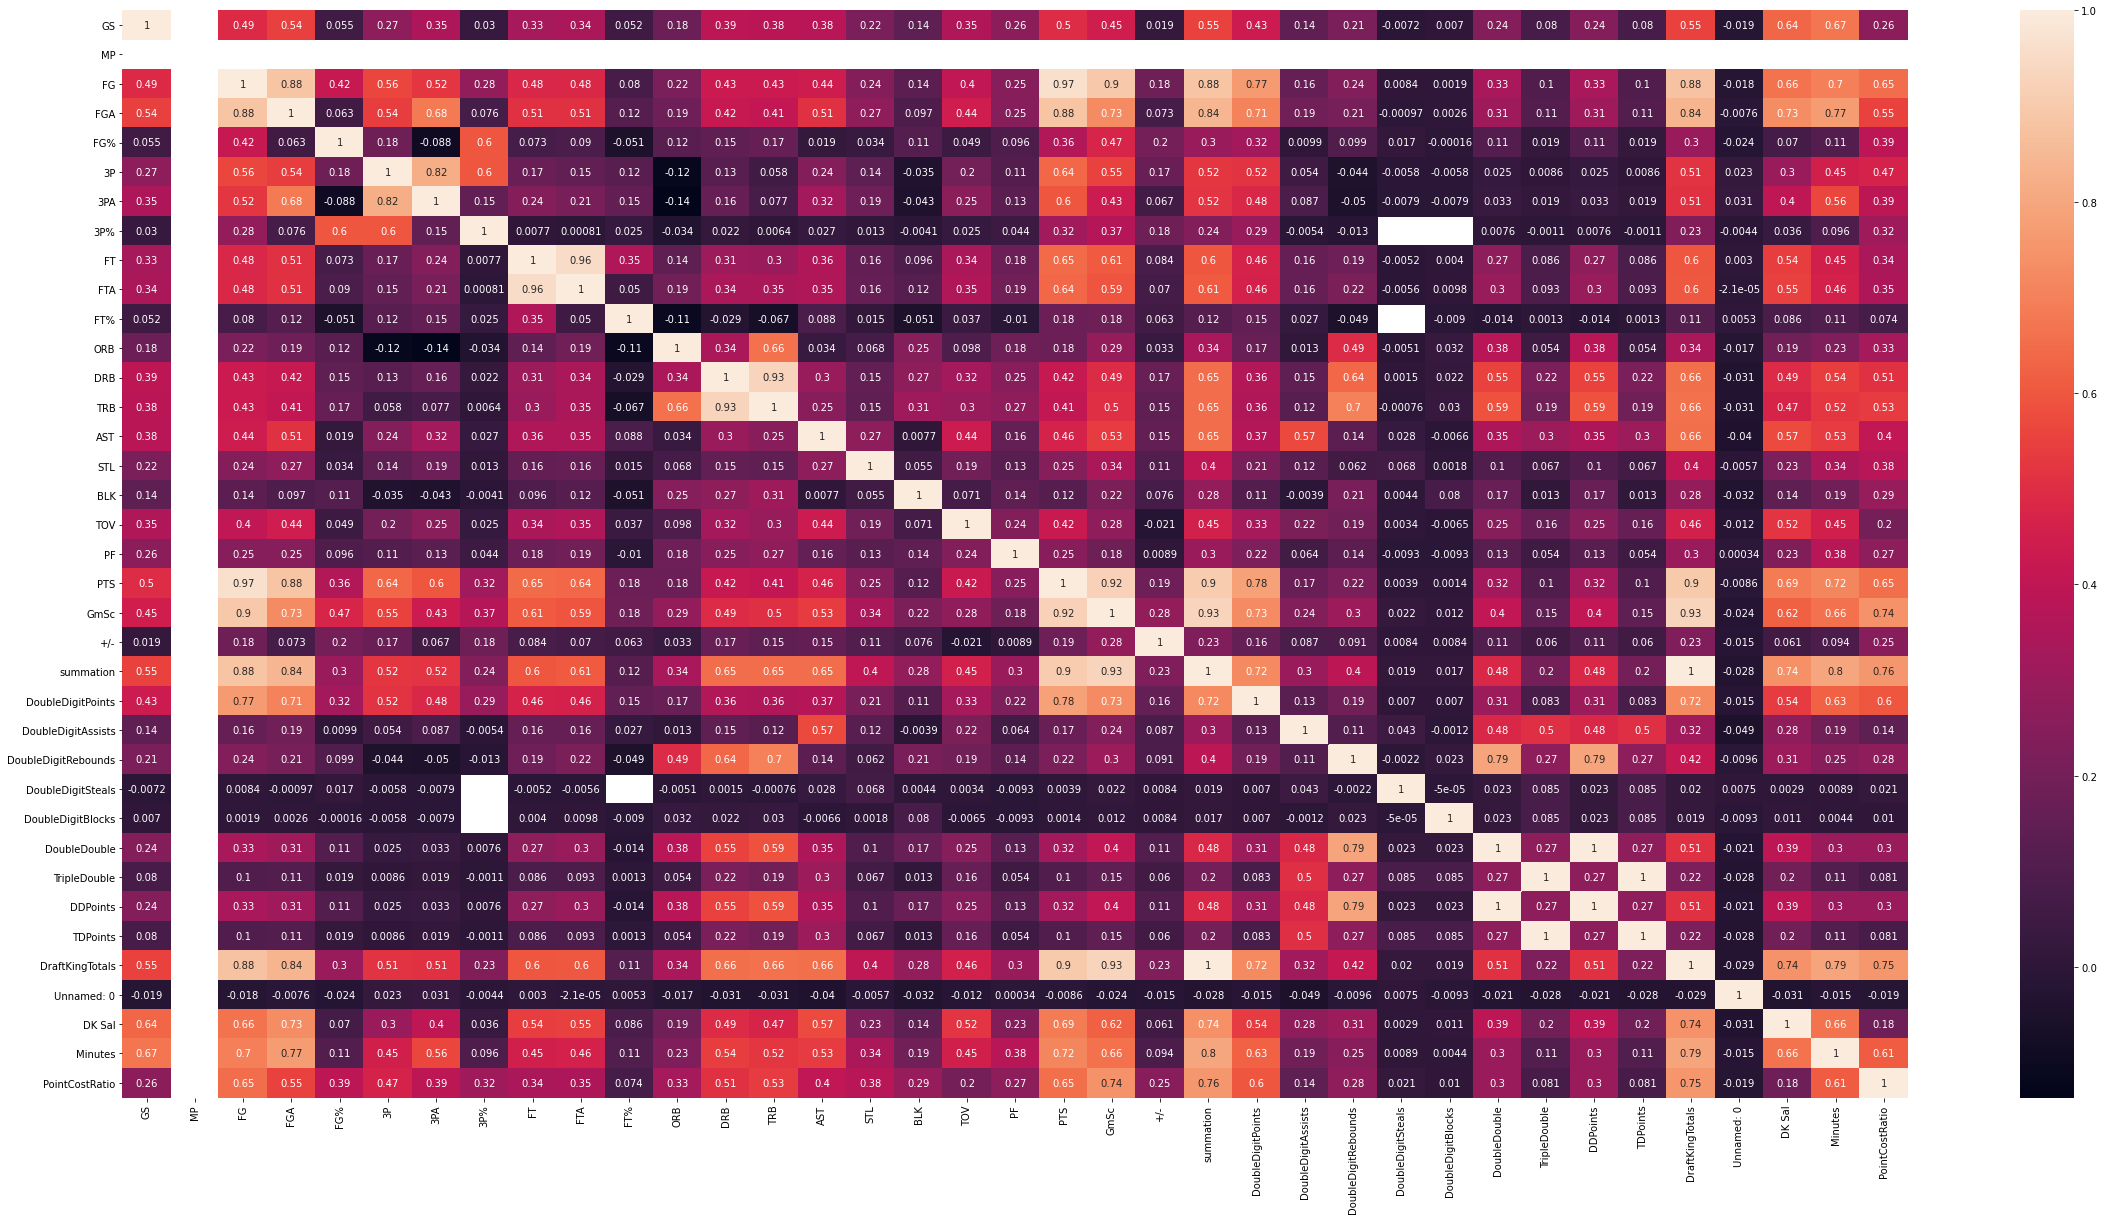

In [65]:
%matplotlib inline
plt.figure(figsize=(40,20))
sns.heatmap(MergedDF.corr(), annot=True)

##### A lot can be learned from looking at this heat map. We can see which stats are most correlated to a strong point to cost ratio. Additionally, we can see what statistics carry more weight and are more dependable. For example, there is a stronger correlation of total rebounds (TRB) to PointCostRatio than for assists (AST) to PointCostRatio. This could tell us that, in terms of pricing, it may be better to favor players who get a lot of rebounds over players who get a lot of assists. It is clear that of the basic statistics, PTS have the greatest correlation to PointCostRatio

<AxesSubplot:xlabel='PTS', ylabel='PointCostRatio'>

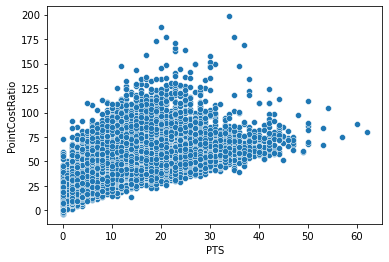

In [66]:
sns.scatterplot(x="PTS", y="PointCostRatio", data=MergedDF)

In [67]:
MergedDF["PointCostRatio"].mean()

43.61523984601861

In [71]:
PlayerAverage= MergedDF.groupby(['PlayerName', 'PointCostRatio'], as_index=False, sort=True).mean().groupby('PlayerName')['PointCostRatio'].mean()

In [72]:
PlayerAverage

PlayerName
Aaron Gordon           41.907940
Aaron Holiday          42.642275
Aaron Nesmith          33.989202
Abdel Nader            41.212948
Al Horford             52.348481
                         ...    
Xavier Tillman Sr.     43.199550
Yuta Watanabe          38.203575
Zach LaVine            49.610438
Zeke Nnaji             27.141388
Zion Williamson        50.507896
Name: PointCostRatio, Length: 418, dtype: float64

In [73]:
SortedAverage=PlayerAverage.sort_values(ascending=False)

In [74]:
SortedAverage

PlayerName
Russell Westbrook     56.608037
Ty Jerome             55.252937
Nikola Jokić          53.883490
Kevin Porter Jr.      53.553873
Kelly Olynyk          53.444172
                        ...    
Udoka Azubuike        12.083333
Tyrell Terry          10.959433
Tyler Bey             10.547327
Nick Richards          9.237231
Jared Harper           3.666667
Name: PointCostRatio, Length: 418, dtype: float64

In [75]:
SortedAverage=SortedAverage.to_frame()

In [76]:
SortedAverage

,PointCostRatio
PlayerName,
Russell Westbrook,56.608037
Ty Jerome,55.252937
Nikola Jokić,53.883490
Kevin Porter Jr.,53.553873
Kelly Olynyk,53.444172
...,...
Udoka Azubuike,12.083333
Tyrell Terry,10.959433
Tyler Bey,10.547327


We now have a good sense of what players can be considered over performers to their pricing and we have a better sense of what average ratios are really good vs really bad.  I think it will be important to analyze standard deviation data also because there could be advantages for identifying players with large ratios and small standard devitaions.  That would mean over performance on a consistent basis.  For future modeling, we may care about standard deviation values more than average values but more to come on that.

In [77]:
PlayerDeviation= MergedDF.groupby(['PlayerName', 'PointCostRatio'], as_index=False, sort=True).mean().groupby('PlayerName')['PointCostRatio'].std()

In [78]:
SortedDeviations=PlayerDeviation.sort_values(ascending=True)

In [79]:
SortedDeviations.mean()

21.243188588599764

In [80]:
SortedDeviations.to_csv("SortedDeviations.csv")

In [81]:
SortedDeviations = SortedDeviations.to_frame()

In [82]:
SortedDeviations

,PointCostRatio
PlayerName,
Jared Harper,3.039097
Spencer Dinwiddie,3.625365
Nick Richards,6.649471
Tyler Bey,7.921265
Kris Dunn,9.702299
...,...
Oshae Brissett,39.747383
Jay Scrubb,48.168396
Jordan Nwora,49.927553


#### The ideal player would be the one with highest Point-Cost Ratio and the smallest "Point-Cost Ratio STANDARD Deviation"

#### That would indicate a consistent over performer

In [83]:
MergeRatios = pd.merge(SortedAverage, SortedDeviations, how="inner", on=["PlayerName"])

In [84]:
MergeRatios['Average']=MergeRatios['PointCostRatio_x']
MergeRatios['StandardDeviation']=MergeRatios['PointCostRatio_y']

In [85]:
MergeRatios

,PointCostRatio_x,PointCostRatio_y,Average,StandardDeviation
PlayerName,,,,
Russell Westbrook,56.608037,12.606392,56.608037,12.606392
Ty Jerome,55.252937,21.725725,55.252937,21.725725
Nikola Jokić,53.883490,11.789333,53.883490,11.789333
Kevin Porter Jr.,53.553873,33.742134,53.553873,33.742134
Kelly Olynyk,53.444172,21.305469,53.444172,21.305469
...,...,...,...,...
Udoka Azubuike,12.083333,11.564176,12.083333,11.564176
Tyrell Terry,10.959433,12.558782,10.959433,12.558782
Tyler Bey,10.547327,7.921265,10.547327,7.921265


In [86]:
MergeRatios.to_csv("Point_Cost_ratio_and_STD.csv")

Text(0.5, 0, 'Average Ratio')

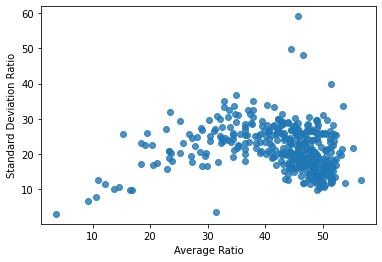

In [87]:
plt.scatter(x="Average", y="StandardDeviation", data=MergeRatios, alpha=0.8)
plt.ylabel("Standard Deviation Ratio")
plt.xlabel("Average Ratio")

In [88]:
first_50 = MergeRatios.head(50)

In [89]:
first_50

,PointCostRatio_x,PointCostRatio_y,Average,StandardDeviation
PlayerName,,,,
Russell Westbrook,56.608037,12.606392,56.608037,12.606392
Ty Jerome,55.252937,21.725725,55.252937,21.725725
Nikola Jokić,53.883490,11.789333,53.883490,11.789333
Kevin Porter Jr.,53.553873,33.742134,53.553873,33.742134
Kelly Olynyk,53.444172,21.305469,53.444172,21.305469
Mason Plumlee,53.200547,19.662144,53.200547,19.662144
T.J. McConnell,52.878969,20.381473,52.878969,20.381473
Al Horford,52.348481,18.573917,52.348481,18.573917
Trevor Ariza,52.326608,25.546529,52.326608,25.546529


In [90]:
del first_50['PointCostRatio_x']
del first_50['PointCostRatio_y']

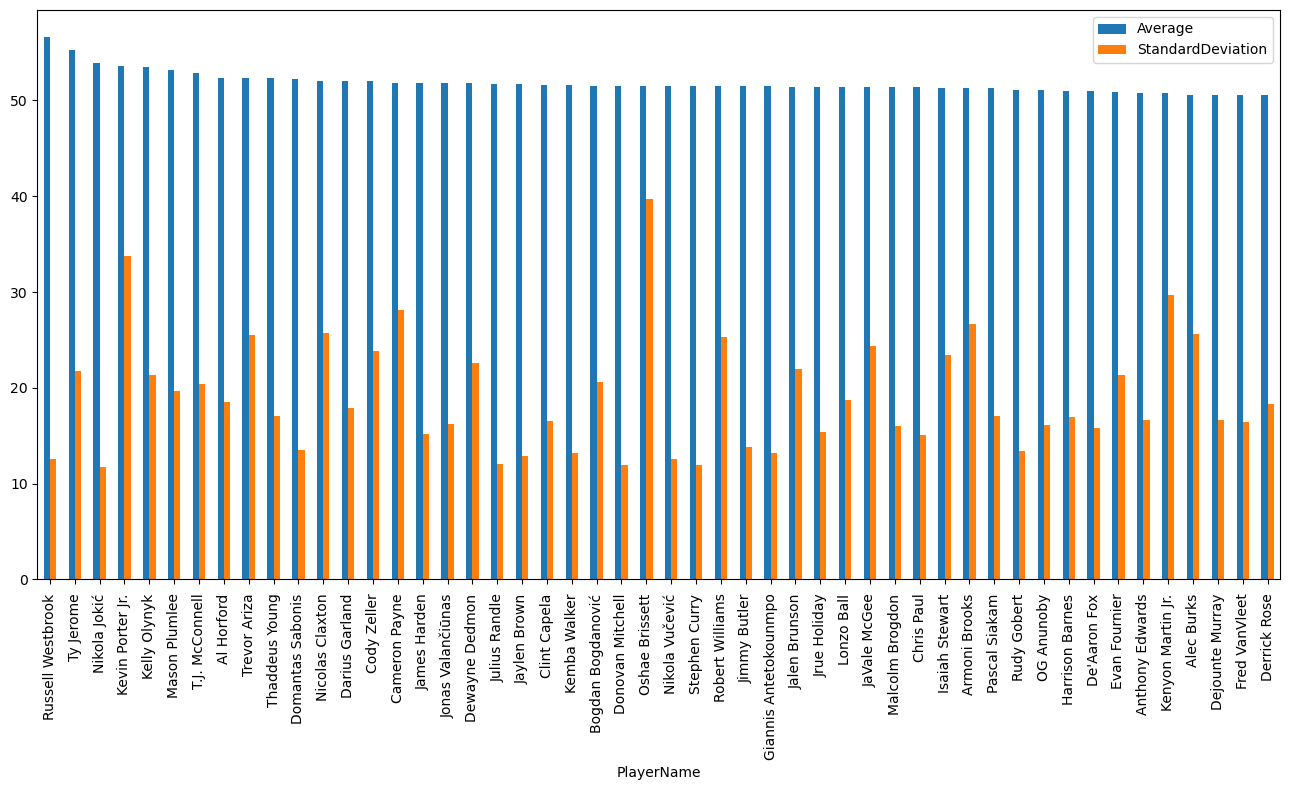

<Figure size 1200x800 with 0 Axes>

In [93]:
first_50.plot.bar()
plt.tight_layout()
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.rcParams['figure.figsize'] = [13, 8]
plt.rcParams['figure.dpi'] = 100
plt.show()

### Ratios on Ratios

In the analysis above, we are exploring average PointCostRatio as well as standard deviation PointCostRatio. It may be beneficial to look at the ratio of the average over the standard deviation. To do this, I will add a new column that is defined as Average_STD_Ratio which represents Average/Standard Deviation. For this ratio, larger numbers will be desireable.

In [94]:
MergeRatios['Average_STD_Ratio']=MergeRatios['Average']/MergeRatios['StandardDeviation']
del MergeRatios['PointCostRatio_x']
del MergeRatios['PointCostRatio_y']

In [95]:
MergeRatios

,Average,StandardDeviation,Average_STD_Ratio
PlayerName,,,
Russell Westbrook,56.608037,12.606392,4.490423
Ty Jerome,55.252937,21.725725,2.543203
Nikola Jokić,53.883490,11.789333,4.570529
Kevin Porter Jr.,53.553873,33.742134,1.587151
Kelly Olynyk,53.444172,21.305469,2.508472
...,...,...,...
Udoka Azubuike,12.083333,11.564176,1.044894
Tyrell Terry,10.959433,12.558782,0.872651
Tyler Bey,10.547327,7.921265,1.331521


In [96]:
MergeRatios.sort_values("Average_STD_Ratio", ascending=False)

,Average,StandardDeviation,Average_STD_Ratio
PlayerName,,,
Spencer Dinwiddie,31.452020,3.625365,8.675546
Kawhi Leonard,49.105433,9.788836,5.016473
LeBron James,50.192744,10.548012,4.758503
Karl-Anthony Towns,49.416888,10.421488,4.741826
Nikola Jokić,53.883490,11.789333,4.570529
...,...,...,...
Alize Johnson,45.767520,59.073153,0.774760
Vernon Carey Jr.,19.380338,26.066825,0.743487
Markus Howard,23.507897,31.859708,0.737857


Spencer Dinwiddle has a promising average and he is really consistent.  He would be a dependable peice within a model- you could have high confidence in him scoring around 31.5 PointCostRatio points in any given game.
Well, it turns out that he only played in 3 games last year so we need to refine this analysis to also look at the number of games played.

In [98]:
Number_games=MergedDF.groupby(['PlayerName'])['PlayerName'].count()
Number_games = Number_games.to_frame()
Number_games

,PlayerName
PlayerName,
Aaron Gordon,49
Aaron Holiday,65
Aaron Nesmith,42
Abdel Nader,23
Al Horford,27
...,...
Xavier Tillman Sr.,57
Yuta Watanabe,50
Zach LaVine,58


In [99]:
Number_games['Number_Games']=Number_games['PlayerName']

In [100]:
Number_games

,PlayerName,Number_Games
PlayerName,,
Aaron Gordon,49,49
Aaron Holiday,65,65
Aaron Nesmith,42,42
Abdel Nader,23,23
Al Horford,27,27
...,...,...
Xavier Tillman Sr.,57,57
Yuta Watanabe,50,50
Zach LaVine,58,58


In [101]:
Number_games=Number_games.drop(['PlayerName'], axis = 1)

In [102]:
Number_games

,Number_Games
PlayerName,
Aaron Gordon,49
Aaron Holiday,65
Aaron Nesmith,42
Abdel Nader,23
Al Horford,27
...,...
Xavier Tillman Sr.,57
Yuta Watanabe,50
Zach LaVine,58


In [103]:
Merge_game_count = MergeRatios.join(Number_games)

In [104]:
Merge_game_count

,Average,StandardDeviation,Average_STD_Ratio,Number_Games
PlayerName,,,,
Russell Westbrook,56.608037,12.606392,4.490423,63
Ty Jerome,55.252937,21.725725,2.543203,32
Nikola Jokić,53.883490,11.789333,4.570529,70
Kevin Porter Jr.,53.553873,33.742134,1.587151,26
Kelly Olynyk,53.444172,21.305469,2.508472,70
...,...,...,...,...
Udoka Azubuike,12.083333,11.564176,1.044894,15
Tyrell Terry,10.959433,12.558782,0.872651,10
Tyler Bey,10.547327,7.921265,1.331521,18


In [105]:
Merge_game_count.sort_values("Average_STD_Ratio", ascending=False)

,Average,StandardDeviation,Average_STD_Ratio,Number_Games
PlayerName,,,,
Spencer Dinwiddie,31.452020,3.625365,8.675546,3
Kawhi Leonard,49.105433,9.788836,5.016473,51
LeBron James,50.192744,10.548012,4.758503,43
Karl-Anthony Towns,49.416888,10.421488,4.741826,50
Nikola Jokić,53.883490,11.789333,4.570529,70
...,...,...,...,...
Alize Johnson,45.767520,59.073153,0.774760,15
Vernon Carey Jr.,19.380338,26.066825,0.743487,18
Markus Howard,23.507897,31.859708,0.737857,35


In [107]:
Merge_game_count.sort_values("Number_Games", ascending=False)

,Average,StandardDeviation,Average_STD_Ratio,Number_Games
PlayerName,,,,
Duncan Robinson,46.387672,16.313829,2.843457,71
Anthony Edwards,50.787231,16.602544,3.059003,71
Justin Holiday,48.234347,18.264875,2.640825,71
Andrew Wiggins,48.613878,14.816738,3.281011,71
Dwayne Bacon,43.890634,19.670971,2.231239,70
...,...,...,...,...
Jay Scrubb,46.517857,48.168396,0.965734,4
Kris Dunn,16.865479,9.702299,1.738297,3
Spencer Dinwiddie,31.452020,3.625365,8.675546,3


In [109]:
Merge_games_15=Merge_game_count[Merge_game_count['Number_Games'] >= 15] 

In [110]:
Merge_games_15=Merge_games_15.sort_values("Average_STD_Ratio", ascending=False)

In [111]:
Merge_games_15

,Average,StandardDeviation,Average_STD_Ratio,Number_Games
PlayerName,,,,
Kawhi Leonard,49.105433,9.788836,5.016473,51
LeBron James,50.192744,10.548012,4.758503,43
Karl-Anthony Towns,49.416888,10.421488,4.741826,50
Nikola Jokić,53.883490,11.789333,4.570529,70
Bam Adebayo,49.758502,10.968569,4.536463,63
...,...,...,...,...
Jalen Smith,22.854167,27.019551,0.845838,25
Alize Johnson,45.767520,59.073153,0.774760,15
Vernon Carey Jr.,19.380338,26.066825,0.743487,18


In [112]:
Games_ratios=Merge_games_15.filter(['Average_STD_Ratio', 'GamesPlayed'], axis=1)

In [113]:
Games_ratios

,Average_STD_Ratio
PlayerName,
Kawhi Leonard,5.016473
LeBron James,4.758503
Karl-Anthony Towns,4.741826
Nikola Jokić,4.570529
Bam Adebayo,4.536463
...,...
Jalen Smith,0.845838
Alize Johnson,0.774760
Vernon Carey Jr.,0.743487


In [114]:
PlayerPositions=pd.read_csv("PlayerDownload.csv")

In [117]:
PlayerPositions['PlayerName']=PlayerPositions['Name']
PlayerPositions

,Unnamed: 0,Name,Pos.,Height,From,To,Seasons,PlayerName
0,0,Precious Achiuwa,C/PF,2.06/ 6'9'',2020,2021,1,Precious Achiuwa
1,1,Steven Adams,C,2.11/ 6'11'',2013,2021,8,Steven Adams
2,2,Bam Adebayo,C,2.06/ 6'9'',2017,2021,4,Bam Adebayo
3,3,Santi Aldama,C/PF,2.11/ 6'11'',----,----,0,Santi Aldama
4,4,LaMarcus Aldridge,C/PF,2.11/ 6'11'',2006,2021,15,LaMarcus Aldridge
...,...,...,...,...,...,...,...,...
516,0,Thaddeus Young,PF/C,2.03/ 6'8'',2007,2021,14,Thaddeus Young
517,1,Trae Young,PG,1.85/ 6'1'',2018,2021,3,Trae Young
518,2,Omer Yurtseven,C,2.13/ 7'0'',----,----,0,Omer Yurtseven
519,0,Cody Zeller,C,2.13/ 7'0'',2013,2021,8,Cody Zeller


In [119]:

PlayerPositions['PlayerName'] = PlayerPositions['PlayerName'].str.rstrip()
#Merge_game_count['PlayerName'] = Merge_game_count['PlayerName'].str.rstrip()


PlayerPositions.set_index('PlayerName')

,Unnamed: 0,Name,Pos.,Height,From,To,Seasons
PlayerName,,,,,,,
Precious Achiuwa,0,Precious Achiuwa,C/PF,2.06/ 6'9'',2020,2021,1
Steven Adams,1,Steven Adams,C,2.11/ 6'11'',2013,2021,8
Bam Adebayo,2,Bam Adebayo,C,2.06/ 6'9'',2017,2021,4
Santi Aldama,3,Santi Aldama,C/PF,2.11/ 6'11'',----,----,0
LaMarcus Aldridge,4,LaMarcus Aldridge,C/PF,2.11/ 6'11'',2006,2021,15
...,...,...,...,...,...,...,...
Thaddeus Young,0,Thaddeus Young,PF/C,2.03/ 6'8'',2007,2021,14
Trae Young,1,Trae Young,PG,1.85/ 6'1'',2018,2021,3
Omer Yurtseven,2,Omer Yurtseven,C,2.13/ 7'0'',----,----,0


In [120]:
PlayerPositions.reset_index(level=0, inplace=True)
#Merge_game_count.reset_index(level=1, inplace=True)
PlayerPositions

,index,Unnamed: 0,Name,Pos.,Height,From,To,Seasons,PlayerName
0,0,0,Precious Achiuwa,C/PF,2.06/ 6'9'',2020,2021,1,Precious Achiuwa
1,1,1,Steven Adams,C,2.11/ 6'11'',2013,2021,8,Steven Adams
2,2,2,Bam Adebayo,C,2.06/ 6'9'',2017,2021,4,Bam Adebayo
3,3,3,Santi Aldama,C/PF,2.11/ 6'11'',----,----,0,Santi Aldama
4,4,4,LaMarcus Aldridge,C/PF,2.11/ 6'11'',2006,2021,15,LaMarcus Aldridge
...,...,...,...,...,...,...,...,...,...
516,516,0,Thaddeus Young,PF/C,2.03/ 6'8'',2007,2021,14,Thaddeus Young
517,517,1,Trae Young,PG,1.85/ 6'1'',2018,2021,3,Trae Young
518,518,2,Omer Yurtseven,C,2.13/ 7'0'',----,----,0,Omer Yurtseven
519,519,0,Cody Zeller,C,2.13/ 7'0'',2013,2021,8,Cody Zeller


In [123]:
Merge_game_count.reset_index(level=0, inplace=True)

In [124]:
Merge_game_count

,PlayerName,Average,StandardDeviation,Average_STD_Ratio,Number_Games
0,Russell Westbrook,56.608037,12.606392,4.490423,63
1,Ty Jerome,55.252937,21.725725,2.543203,32
2,Nikola Jokić,53.883490,11.789333,4.570529,70
3,Kevin Porter Jr.,53.553873,33.742134,1.587151,26
4,Kelly Olynyk,53.444172,21.305469,2.508472,70
...,...,...,...,...,...
413,Udoka Azubuike,12.083333,11.564176,1.044894,15
414,Tyrell Terry,10.959433,12.558782,0.872651,10
415,Tyler Bey,10.547327,7.921265,1.331521,18
416,Nick Richards,9.237231,6.649471,1.389168,17


In [125]:
Merge_game_count['PlayerName'] = Merge_game_count['PlayerName'].str.rstrip()

In [126]:
Merge_game_count

,PlayerName,Average,StandardDeviation,Average_STD_Ratio,Number_Games
0,Russell Westbrook,56.608037,12.606392,4.490423,63
1,Ty Jerome,55.252937,21.725725,2.543203,32
2,Nikola Jokić,53.883490,11.789333,4.570529,70
3,Kevin Porter Jr.,53.553873,33.742134,1.587151,26
4,Kelly Olynyk,53.444172,21.305469,2.508472,70
...,...,...,...,...,...
413,Udoka Azubuike,12.083333,11.564176,1.044894,15
414,Tyrell Terry,10.959433,12.558782,0.872651,10
415,Tyler Bey,10.547327,7.921265,1.331521,18
416,Nick Richards,9.237231,6.649471,1.389168,17


In [128]:
merged = pd.merge(Merge_game_count, PlayerPositions, how="inner", on=["PlayerName"])

In [130]:
PlayerStats=Merge_game_count

In [131]:
PlayerPositions['PlayerName'] = PlayerPositions['PlayerName'].replace(['LouisWilliams'],'LouWilliams')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['BobanMarjanović'],'BobanMarjanovic')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['NikolaJokić'],'Nikola Jokic')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['MarvinBagleyIII'],'MarvinBagley')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['MoBamba'],'MohamedBamba')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['DeAndre\'Bembry'],'DeAndreBembry')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['BogdanBogdanović'],'BogdanBogdanovic')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['BojanBogdanović'],'BojanBogdanovic')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['VlatkoČančar'],'VlatkoCancar')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['DāvisBertāns'],'DavisBertans')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['LukaDončić'],'LukaDoncic')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['GoranDragić'],'GoranDragic')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['JuanHernangómez'],'JuanHernangomez')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['WillyHernangómez'],'WillyHernangomez')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['WesleyIwundu'],'WesIwundu')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['Nikola Jokic'],'NikolaJokic')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['DerrickJonesJr.'],'DerrickJones')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['JarenJacksonJr.'],'JarenJackson')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['ThéoMaledon'],'TheoMaledon')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['BobanMarjanović'],'BobanMarjanovic')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['LarryNanceJr.'],'LarryNance')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['JusufNurkić'],'JusufNurkic')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['KellyOubreJr.'],'KellyOubre')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['MichaelPorterJr.'],'MichaelPorter')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['KristapsPorziņģis'],'KristapsPorziņgis')
PlayerPositions['PlayerName'] = PlayerPositions['PlayerName'].replace(['KristapsPorzingis'],'KristapsPorziņgis')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['LukaŠamanić'],'LukaSamanic')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['DennisSchröder'],'DennisSchroder')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['IshSmith'],'IshmaelSmith')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['XavierTillmanSr.'],'XavierTillman')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['JonasValančiūnas'],'JonasValanciunas')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['NikolaVučević'],'NikolaVucevic')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['CJMcCollum'],'C.J.McCollum')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['TomášSatoranský'],'TomasSatoransky')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['DarioŠarić'],'DarioSaric')
PlayerPositions['PlayerName'] = PlayerPositions['PlayerName'].replace(['GuillermoHernangomez'],'WillyHernangomez')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['TimothéLuwawu-Cabarrot'],'TimotheLuwawu')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['KevinPorterJr.'],'KevinPorter')

PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['WesleyMatthews'],'WesMatthews')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['CristianoFelício'],'CristianoFelicio')
PlayerStats['PlayerName'] = PlayerStats['PlayerName'].replace(['NicolòMelli'],'NicoloMelli')

In [132]:
Positions_added = pd.merge(PlayerStats, PlayerPositions, how="inner", on=["PlayerName"])

In [133]:
Positions_added

,PlayerName,Average,StandardDeviation,Average_STD_Ratio,Number_Games,index,Unnamed: 0,Name,Pos.,Height,From,To,Seasons
0,Russell Westbrook,56.608037,12.606392,4.490423,63,494,14,Russell Westbrook,PG/SG,1.91/ 6'3'',2008,2021,13
1,Ty Jerome,55.252937,21.725725,2.543203,32,239,7,Ty Jerome,PG/SG,1.96/ 6'5'',2019,2021,2
2,Kevin Porter Jr.,53.553873,33.742134,1.587151,26,389,13,Kevin Porter Jr.,SG/PG,1.93/ 6'4'',2019,2021,2
3,Kelly Olynyk,53.444172,21.305469,2.508472,70,369,9,Kelly Olynyk,C/PF,2.11/ 6'11'',2013,2021,8
4,Mason Plumlee,53.200547,19.662144,2.705735,55,384,8,Mason Plumlee,C,2.11/ 6'11'',2013,2021,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,Udoka Azubuike,12.083333,11.564176,1.044894,15,21,21,Udoka Azubuike,C,2.13/ 7'0'',2020,2021,1
385,Tyrell Terry,10.959433,12.558782,0.872651,10,453,4,Tyrell Terry,PG,1.91/ 6'3'',2020,2021,1
386,Tyler Bey,10.547327,7.921265,1.331521,18,43,21,Tyler Bey,SG/SF,2.01/ 6'7'',2020,2021,1
387,Nick Richards,9.237231,6.649471,1.389168,17,407,6,Nick Richards,C,2.11/ 6'11'',2020,2021,1


In [134]:
Positions_added=Positions_added[Positions_added.To !='----']

In [135]:
Positions_added['Pos.'].unique()

array(['PG/SG', 'SG/PG', 'C/PF', 'C', 'PG', 'SF/PF', 'PF/C', 'PF',
       'SF/SG', 'SG/SF', 'PF/SF', 'SG', 'SF'], dtype=object)

In [ ]:
sns.catplot(x="Pos.", y="Average_STD_Ratio", kind="swarm", data=Positions_added)
plt.xticks(rotation=45)